# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install python-Levenshtein
import Levenshtein

from sklearn.preprocessing import MinMaxScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.8 MB/s eta 0:00:00


# Data Understanding

In [2]:
data = pd.read_csv('/kaggle/input/egypt-houses-price/Egypt_Houses_Price.csv')
data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [4]:
data.duplicated().sum()

1591

**Observations:**

*   Some columns (e.g., Price, Bedrooms, Bathrooms, and Area) contain missing values.

*   Price, Bedrooms, Bathrooms, level, and Area are stored as object types, this means they may contain non-numeric values or extra characters.

*   There's 1591 duplicated rows.

*   The data contains 27361 row and 12 columns

# Data Preparation & Cleaning

In [5]:
df = data.copy()

In [6]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25770 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            25770 non-null  object
 1   Price           25768 non-null  object
 2   Bedrooms        25570 non-null  object
 3   Bathrooms       25602 non-null  object
 4   Area            25305 non-null  object
 5   Furnished       25770 non-null  object
 6   Level           25770 non-null  object
 7   Compound        25770 non-null  object
 8   Payment_Option  25770 non-null  object
 9   Delivery_Date   25770 non-null  object
 10  Delivery_Term   25770 non-null  object
 11  City            25770 non-null  object
dtypes: object(12)
memory usage: 2.6+ MB


In [7]:
df['Type'].unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Unknown', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [8]:
#The "Type" column has two variations for the same property(eg:"twin house" and "Twin House"), so we will standarize them
df['Type'].replace('Standalone Villa', 'Stand Alone Villa', inplace=True)
df['Type'].replace('Twin house', 'Twin House', inplace=True)
df['Type'].unique()

<ipython-input-8-0b727d6f224b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].replace('Standalone Villa', 'Stand Alone Villa', inplace=True)
<ipython-input-8-0b727d6f224b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Unknown', 'Chalet',
       'Stand Alone Villa', 'Twin House', 'Town House'], dtype=object)

In [9]:
counter = 0
for i in df['Price']:
  try:
     x = int(i)
  except:
    print(i)
    counter += 1
print(counter)

Unknown
Unknown
Unknown
Unknown
nan
nan
Unknown
7


In [10]:
df[df['Price'] == 'Unknown']

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
216,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,Only in Apartments & Duplex for Sale
8543,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,About EMPG
10892,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,Only in Vacation Homes for Sale
18550,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,Only in Villas For Sale
27294,Twin House,Unknown,3.0,3.0,427.0,No,Unknown,Madinaty,Cash,Ready to move,Finished,Madinaty


In [11]:
#Price column contains some 'Unknown' values, most of them for empty records, so we will replace them
df = df[(df['Price'] != 'Unknown') & (df['Type'] != 'Unknown')]
df['Price'] = df['Price'].replace('Unknown', np.nan)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

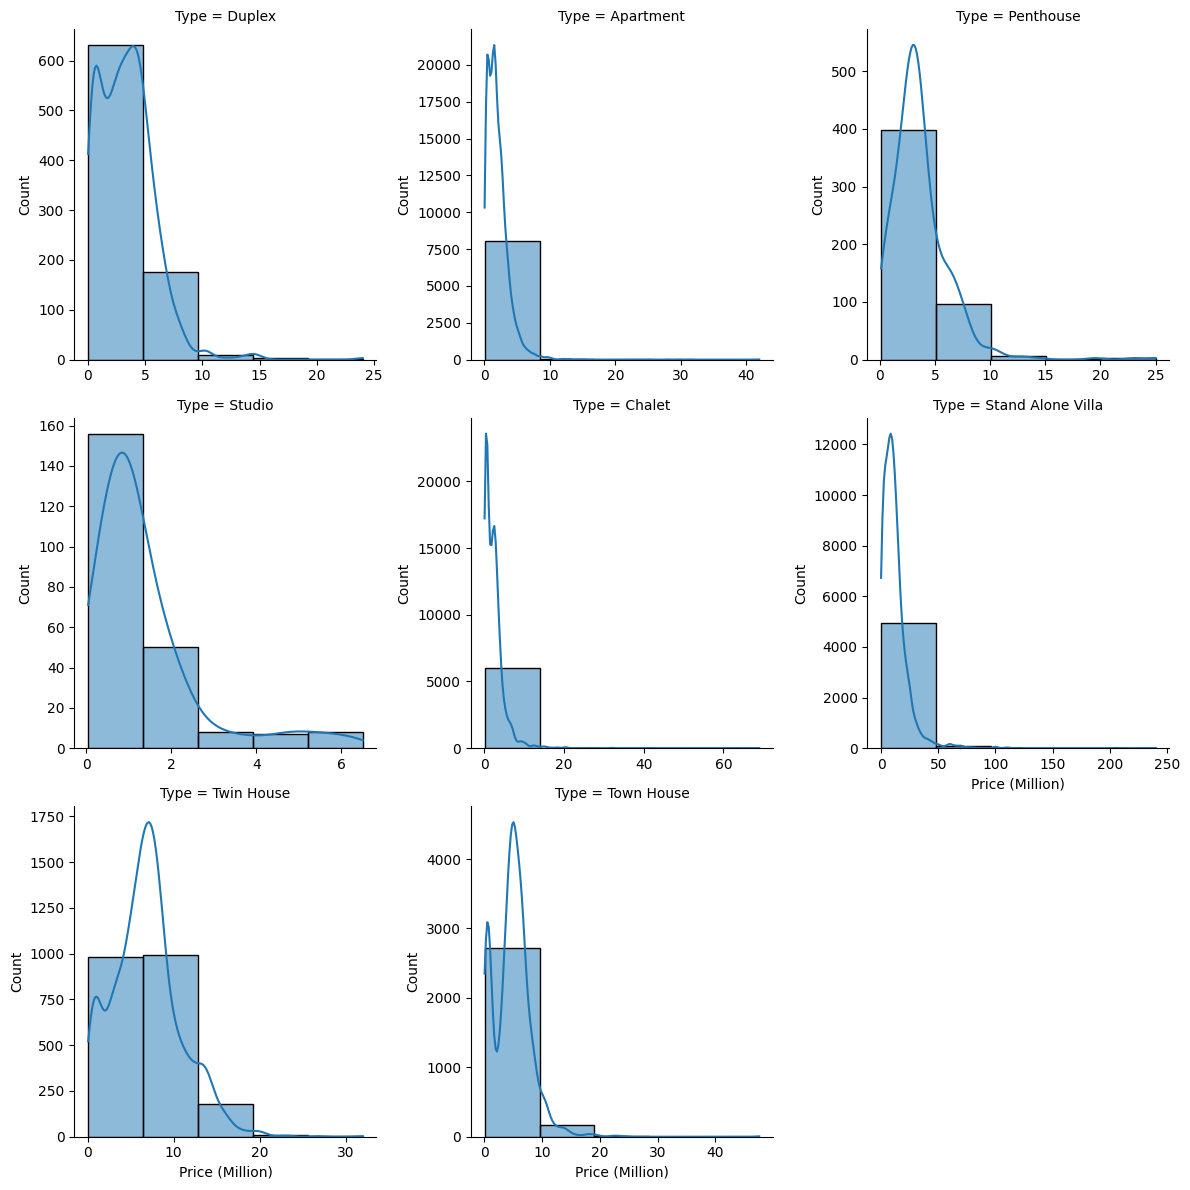

In [12]:
#Now it's time to convert the price column type into float
df['Price'] = df['Price'].astype(float)

#Taking a copy to modify for the visual
part = df.copy()
part['Price'] = part['Price'] / 1e6

#Drawing histogram to show the distribution
g = sns.FacetGrid(part, col="Type", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="Price", bins=5, kde=True)
g.set_xlabels("Price (Million)")

plt.show()

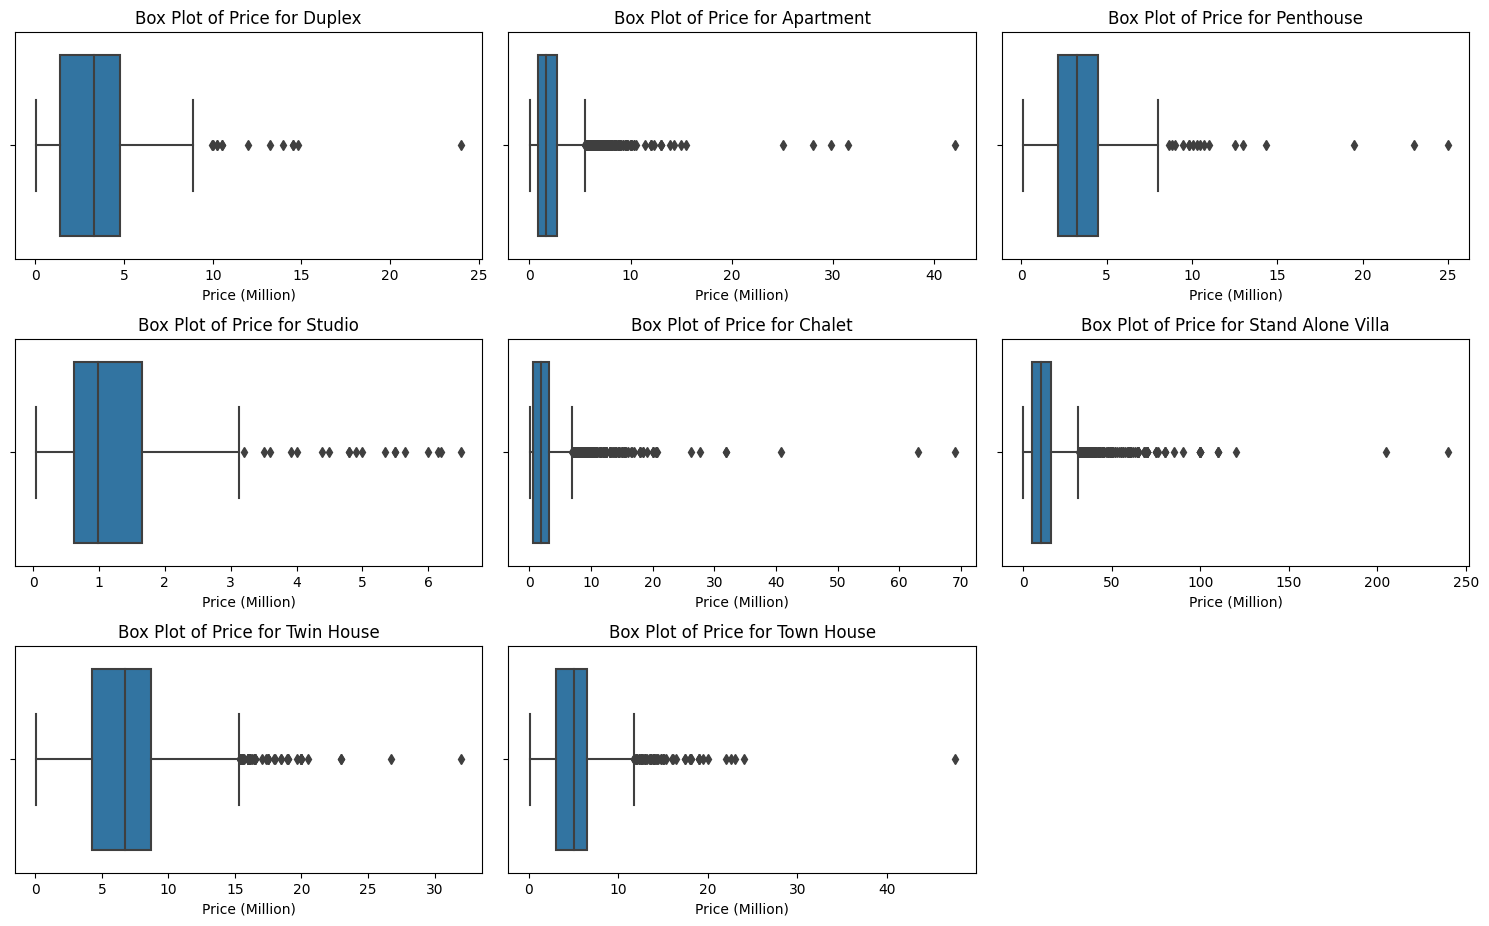

In [13]:
#Visualising Boxplot to see the outliers
property_types = df["Type"].unique()

rows, cols = 4, 3
total_plots = len(property_types)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12))
axes = axes.flatten()

# Plot each property type in a separate subplot
for i, prop_type in enumerate(property_types):
    sns.boxplot(x=df[df["Type"] == prop_type]["Price"] / 1e6, ax=axes[i])
    axes[i].set_title(f'Box Plot of Price for {prop_type}')
    axes[i].set_xlabel("Price (Million)")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
#Dropping outliers in each property type
outlier_counts = {}
total_outlier = 0

for i, prop_type in enumerate(property_types):
    
    
    price_data = df[(df["Type"] == prop_type) & ~df["Price"].isna()]["Price"]
    
    Q1 = np.percentile(price_data, 25)
    Q3 = np.percentile(price_data, 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers (values below lower_bound or above upper_bound)
    outliers = price_data[(price_data < lower_bound) | (price_data > upper_bound)]
    outlier_count = len(outliers)
      
    all_count = len(price_data)

    total_outlier = total_outlier + outlier_count
    
    # Store the outlier count for this property type
    outlier_counts[prop_type] = round(outlier_count/all_count*100,2)
    
    df=df[~((df["Type"]==prop_type) &((price_data < lower_bound) | (price_data > upper_bound)))]
    # df[((df["Type"]==prop_type) &((price_data < lower_bound) | (price_data > upper_bound)))]["Price"]=np.nan

# Print the outlier counts
for prop_type, count in outlier_counts.items():
    
    print(f"{prop_type} has {count}% outliers")
print("total number of outlier :"+str(total_outlier) +" and represent "+str(round(total_outlier/df.shape[0]*100,2)) +" % from the data"  )

Duplex has 1.59% outliers
Apartment has 3.18% outliers
Penthouse has 3.37% outliers
Studio has 8.3% outliers
Chalet has 4.12% outliers
Stand Alone Villa has 4.33% outliers
Twin House has 2.5% outliers
Town House has 2.28% outliers
total number of outlier :892 and represent 3.59 % from the data


In [15]:
df['Bedrooms'].unique()

array(['3.0', '4.0', '5.0', '2.0', '1.0', '7.0', '6.0', '10+', '3', '2',
       '5', '4', '1', '6', nan, '7', '8', '10', '9', '9.0', '8.0', '10.0'],
      dtype=object)

In [16]:
df[df['Bedrooms'] == '10+']

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
1746,Apartment,2000000.0,10+,10+,550.0,Unknown,5,Unknown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

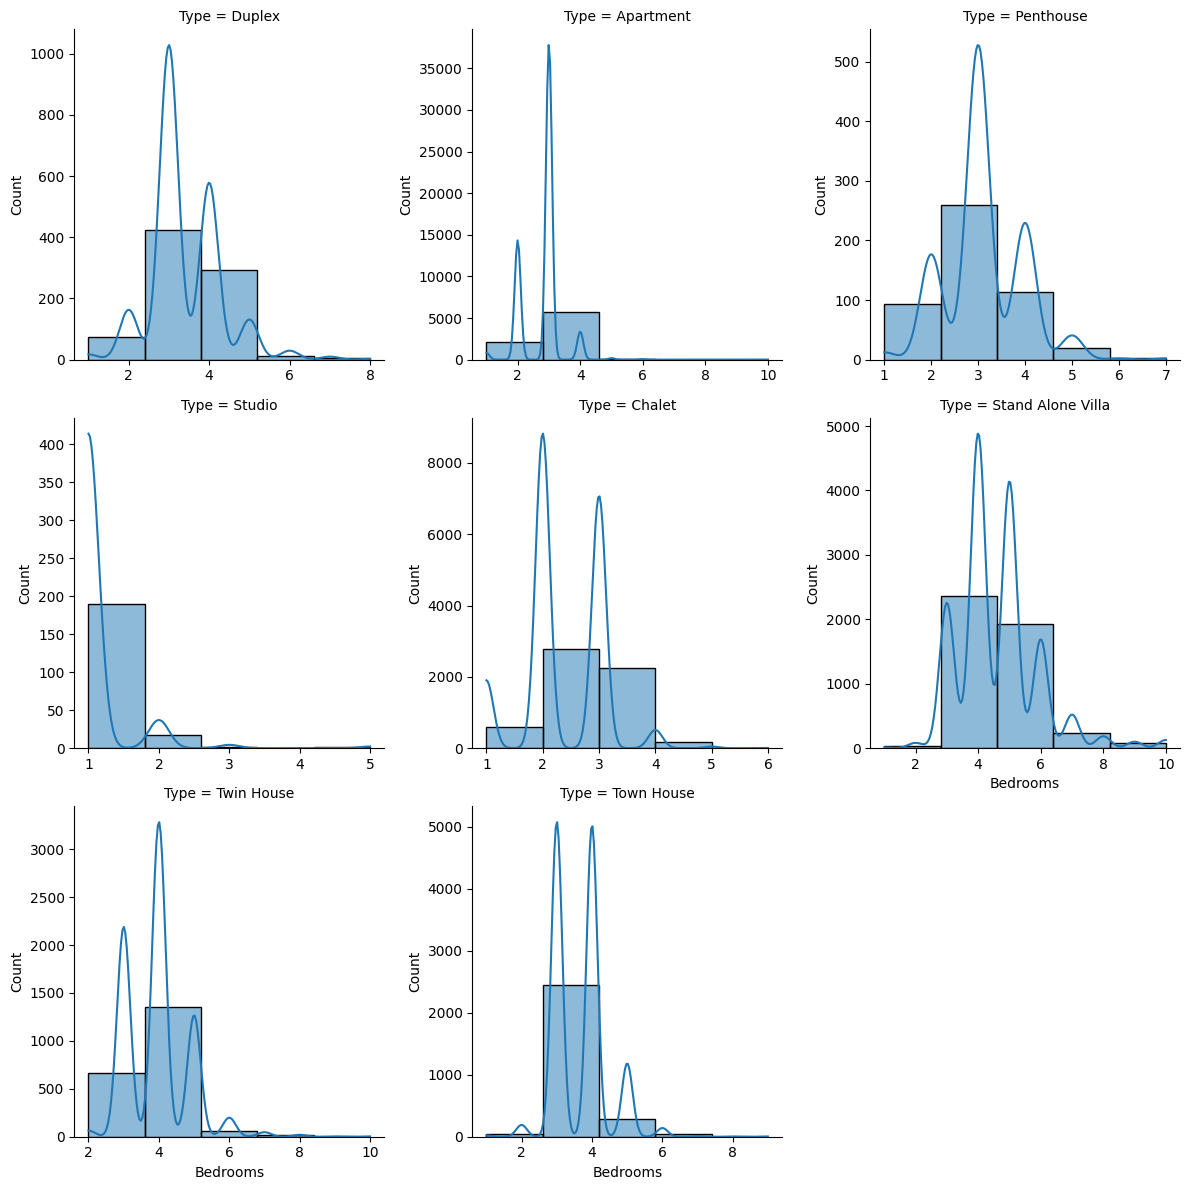

In [17]:
#There's one value in Bedrooms column contains '10+' value so we will replace it with 11
df['Bedrooms'] = df['Bedrooms'].replace('10+', '10')

#Converting the column type into numeric to visualize
df['Bedrooms'] = df['Bedrooms'].astype(float)

#Drawing histogram to show the distribution
g = sns.FacetGrid(df, col="Type", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="Bedrooms", bins=5, kde=True)
plt.show()

In [18]:
# #Converting the column type into integer
df['Bedrooms'] = df['Bedrooms'].astype(float)

In [19]:
# Define the valid range for each home type
valid_ranges = {
    "Chalet": (1, 3),
    "Apartment": (1, 4),
    "Studio": (1, 2),
    "Penthouse": (1, 4),
    "Duplex": (2, 8),
    "Stand Alone Villa": (3, 6),
    "Twin House": (3, 6),
    "Town House": (3, 6)
}


# Checking the number of properties with out of range number of bedrooms and bathrooms
invalid_rows = 0

for prop_type, (min_bed, max_bed) in valid_ranges.items():
    mask = df["Type"] == prop_type
    invalid_bed = df[mask][(df["Bedrooms"] < min_bed) | (df["Bedrooms"] > max_bed)]
    invalid_rows += len(invalid_bed)

print(f"\nTotal invalid rows: {invalid_rows}")



Total invalid rows: 679


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
<ipython-input-19-eff4a7b17270>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_bed = df[mask][(df["Bedrooms"] < min_bed) | (df["Bedrooms"] > max_bed)]
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
<ipython-input-19-eff4a7b17270>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_bed = df[mask][(df["Bedrooms"] < min_bed) | (df["Bedrooms"] > max_bed)]
/u

In [20]:
# Fixing the range of bathrooms and bedrooms
def enforce_bed_ranges(df):
    # Define valid ranges
    valid_ranges = {
    "Chalet": (1, 3),
    "Apartment": (1, 4),
    "Studio": (1, 2),
    "Penthouse": (1, 4),
    "Duplex": (2, 8),
    "Stand Alone Villa": (3, 6),
    "Twin House": (3, 6),
    "Town House": (3, 6),
    }

    for prop_type, (min_bed, max_bed) in valid_ranges.items():
        # Filter rows of the current property type
        mask = df["Type"] == prop_type

        # Clip values within a 10% margin
        df.loc[mask & (df["Bedrooms"] < min_bed) & (df["Bedrooms"] >= min_bed * 0.9), "Bedrooms"] = min_bed
        df.loc[mask & (df["Bedrooms"] > max_bed) & (df["Bedrooms"] <= max_bed * 1.1), "Bedrooms"] = max_bed

        # Converting extreme outliers to nans
        df.loc[(mask & ((df["Bedrooms"] < min_bed * 0.9) | (df["Bedrooms"] > max_bed * 1.1)))] = np.nan

    return df

# Apply function
df = enforce_bed_ranges(df)


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressio

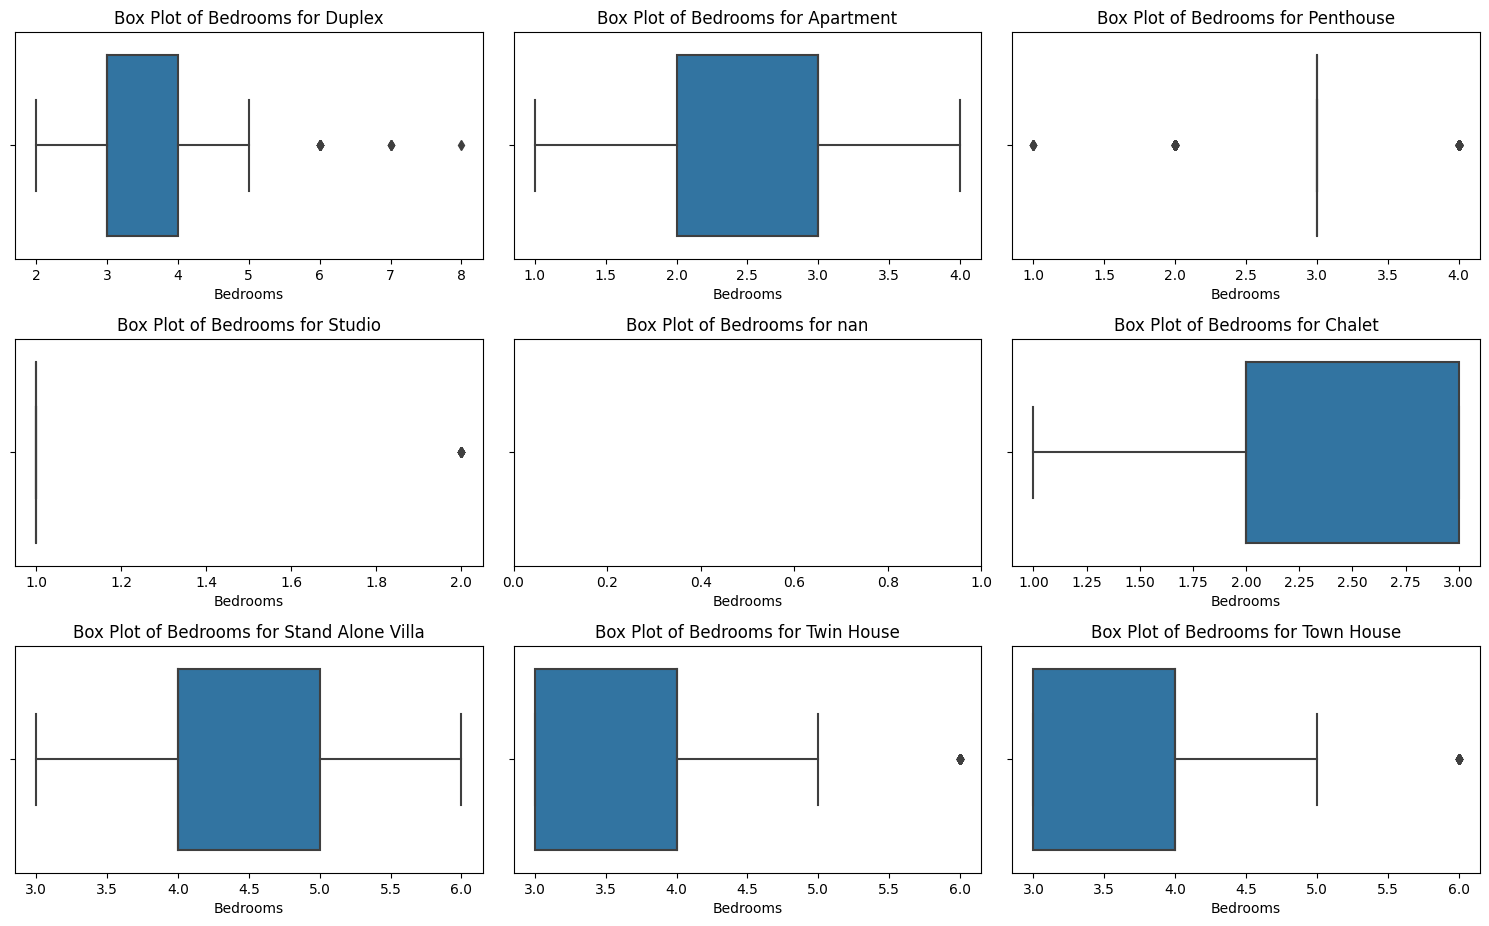

In [21]:
#Visualising Boxplot to see the outliers
property_types = df["Type"].unique()

rows, cols = 4, 3
total_plots = len(property_types)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12))
axes = axes.flatten()

# Plot each property type in a separate subplot
for i, prop_type in enumerate(property_types):
    sns.boxplot(x=df[df["Type"] == prop_type]["Bedrooms"], ax=axes[i])
    axes[i].set_title(f'Box Plot of Bedrooms for {prop_type}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [22]:
#Exploring outliers in each property type
outlier_counts = {}
total_outlier = 0

for i, prop_type in enumerate(property_types):
    
    bedroom_data = df[(df["Type"] == prop_type) & ~(df["Bedrooms"].isnull())]["Bedrooms"]
    if len(bedroom_data) == 0:
        print(prop_type)
        continue

   
    
    Q1 = np.percentile(bedroom_data, 25)
    Q3 = np.percentile(bedroom_data, 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers (values below lower_bound or above upper_bound)
    outliers = bedroom_data[(bedroom_data < lower_bound) | (bedroom_data > upper_bound)]
    outlier_count = len(outliers)
      
    all_count = len(bedroom_data)

    total_outlier = total_outlier + outlier_count
    
    # Store the outlier count for this property type
    outlier_counts[prop_type] = round(outlier_count/all_count*100,2)
    
    # df=df[~((df["Type"]==prop_type) &((bedroom_data < lower_bound) | (bedroom_data > upper_bound)))]
    df[(df["Type"]==prop_type) &((bedroom_data < lower_bound) | (bedroom_data > upper_bound))]["Bedrooms"]=np.nan


# Print the outlier counts
for prop_type, count in outlier_counts.items():
    
    print(f"{prop_type} has {count}% outliers")
print("total number of outlier :"+str(total_outlier) +" and represent "+str(round(total_outlier/df.shape[0]*100,2)) +" % from the data"  )

nan
Duplex has 2.13% outliers
Apartment has 0.0% outliers
Penthouse has 44.21% outliers
Studio has 8.21% outliers
Chalet has 0.0% outliers
Stand Alone Villa has 0.0% outliers
Twin House has 2.86% outliers
Town House has 1.23% outliers
total number of outlier :333 and represent 1.34 % from the data


<ipython-input-22-6f65f936ead6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df["Type"]==prop_type) &((bedroom_data < lower_bound) | (bedroom_data > upper_bound))]["Bedrooms"]=np.nan
<ipython-input-22-6f65f936ead6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df["Type"]==prop_type) &((bedroom_data < lower_bound) | (bedroom_data > upper_bound))]["Bedrooms"]=np.nan
<ipython-input-22-6f65f936ead6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [23]:
df['Bathrooms'].unique()

array(['3.0', '2.0', '5.0', '1.0', '4.0', nan, '7.0', '3', '2', '1', '4',
       '6', '5', '7', '6.0', '9', '8', '10', '8.0', '9.0', '10.0'],
      dtype=object)

In [24]:
df[df['Bathrooms'] == '10+']

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

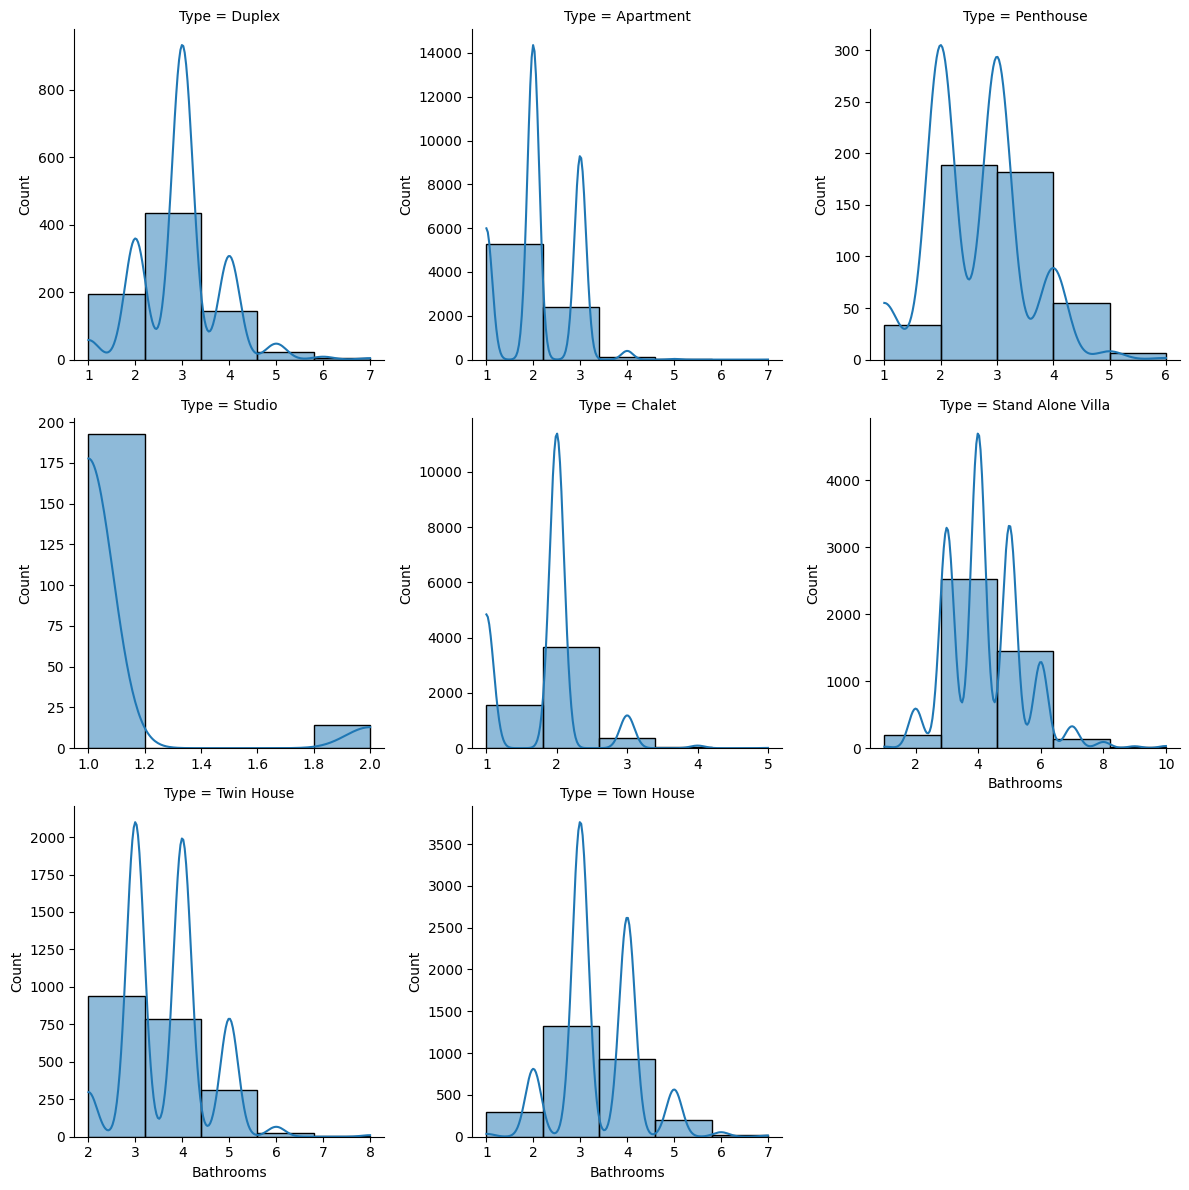

In [25]:
#Converting the column type into numeric to visualize
df['Bathrooms'] = df['Bathrooms'].astype(float)

#Drawing histogram to show the distribution
g = sns.FacetGrid(df, col="Type", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="Bathrooms", bins=5, kde=True)
plt.show()

In [26]:
# #Converting the data type of the column into int
df['Bathrooms'] = df['Bathrooms'].astype(float)

In [27]:
# Define the valid range for each home type
valid_ranges = {
    "Chalet": (1, 3),
    "Apartment": (1, 3),
    "Studio": (1, 2),
    "Penthouse": (1, 3),
    "Duplex": (2, 6),
    "Stand Alone Villa": (2, 5),
    "Twin House": (2, 5),
    "Town House": (2, 5)
}


# Checking the number of properties with out of range number of bedrooms and bathrooms
invalid_rows = 0

for prop_type, (min_bath, max_bath) in valid_ranges.items():
    mask = df["Type"] == prop_type
    invalid_bath = df[mask][(df["Bathrooms"] < min_bath) | (df["Bathrooms"] > max_bath)]
    invalid_rows += len(invalid_bath)

print(f"\nTotal invalid rows: {invalid_rows}")



Total invalid rows: 865


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
<ipython-input-27-7ca6936e5762>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_bath = df[mask][(df["Bathrooms"] < min_bath) | (df["Bathrooms"] > max_bath)]
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
<ipython-input-27-7ca6936e5762>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_bath = df[mask][(df["Bathrooms"] < min_bath) | (df["Bathrooms"] > max

In [28]:
# Fixing the range of bathrooms and bedrooms
def enforce_bath_ranges(df):
    # Define valid ranges
    valid_ranges = {
    "Chalet": (1, 3),
    "Apartment": (1, 3),
    "Studio": (1, 2),
    "Penthouse": (1, 3),
    "Duplex": (2, 6),
    "Stand Alone Villa": (2, 5),
    "Twin House": (2, 5),
    "Town House": (2, 5),
    }

    for prop_type, (min_bath, max_bath) in valid_ranges.items():
        # Filter rows of the current property type
        mask = df["Type"] == prop_type

        # Clip values within a 10% margin
        df.loc[mask & (df["Bathrooms"] < min_bath) & (df["Bathrooms"] >= min_bath * 0.9), "Bathrooms"] = min_bath
        df.loc[mask & (df["Bathrooms"] > max_bath) & (df["Bathrooms"] <= max_bath * 1.1), "Bathrooms"] = max_bath

        # Converting extreme outliers into nan
        df.loc[(mask & ((df["Bathrooms"] < min_bath * 0.9) | (df["Bathrooms"] > max_bath * 1.1)))] = np.nan

    return df

# Apply function
df = enforce_bath_ranges(df)


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressio

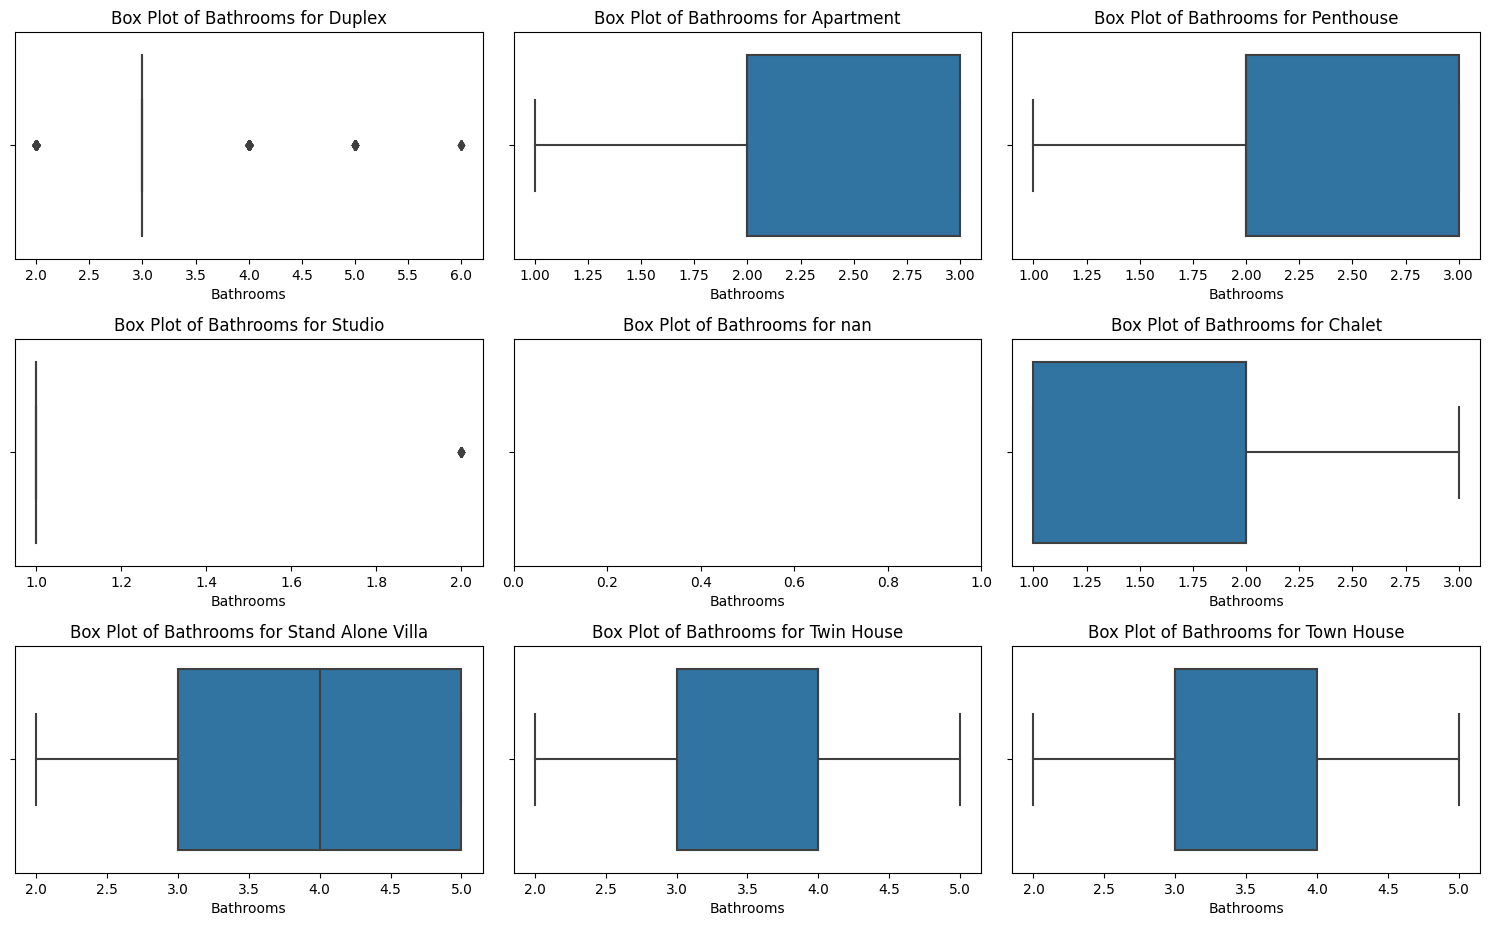

In [29]:
#Visualising Boxplot to see the outliers
property_types = df["Type"].unique()

rows, cols = 4, 3
total_plots = len(property_types)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12))
axes = axes.flatten()

# Plot each property type in a separate subplot
for i, prop_type in enumerate(property_types):
    sns.boxplot(x=df[df["Type"] == prop_type]["Bathrooms"], ax=axes[i])
    axes[i].set_title(f'Box Plot of Bathrooms for {prop_type}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [30]:
#Exploring outliers in each property type
outlier_counts = {}
total_outlier = 0

for i, prop_type in enumerate(property_types):
    
    bathroom_data = df[df["Type"] == prop_type]["Bathrooms"]

    if len(bathroom_data) == 0:
        print(prop_type)
        continue
    
    Q1 = np.percentile(bathroom_data, 25)
    Q3 = np.percentile(bathroom_data, 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers (values below lower_bound or above upper_bound)
    outliers = bathroom_data[(bathroom_data < lower_bound) | (bathroom_data > upper_bound)]
    outlier_count = len(outliers)
      
    all_count = len(bathroom_data)

    total_outlier = total_outlier + outlier_count
    
    # Store the outlier count for this property type
    outlier_counts[prop_type] = round(outlier_count/all_count*100,2)
    
    # df=df[~((df["Type"]==prop_type) &((bathroom_data < lower_bound) | (bathroom_data > upper_bound)))]
    df[((df["Type"]==prop_type) &((bathroom_data < lower_bound) | (bathroom_data > upper_bound)))]["Bathrooms"]=np.nan
    

# Print the outlier counts
for prop_type, count in outlier_counts.items():
    
    print(f"{prop_type} has {count}% outliers")
print("total number of outlier :"+str(total_outlier) +" and represent "+str(round(total_outlier/df.shape[0]*100,2)) +" % from the data"  )

nan
Duplex has 43.64% outliers
Apartment has 0.0% outliers
Penthouse has 0.0% outliers
Studio has 6.76% outliers
Chalet has 0.0% outliers
Stand Alone Villa has 0.0% outliers
Twin House has 0.0% outliers
Town House has 0.0% outliers
total number of outlier :350 and represent 1.41 % from the data


<ipython-input-30-b4d5fa3b55d3>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[((df["Type"]==prop_type) &((bathroom_data < lower_bound) | (bathroom_data > upper_bound)))]["Bathrooms"]=np.nan
<ipython-input-30-b4d5fa3b55d3>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[((df["Type"]==prop_type) &((bathroom_data < lower_bound) | (bathroom_data > upper_bound)))]["Bathrooms"]=np.nan


In [31]:
for i in df['Area']:
  try:
     x = float(i)
  except:
    print(i)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

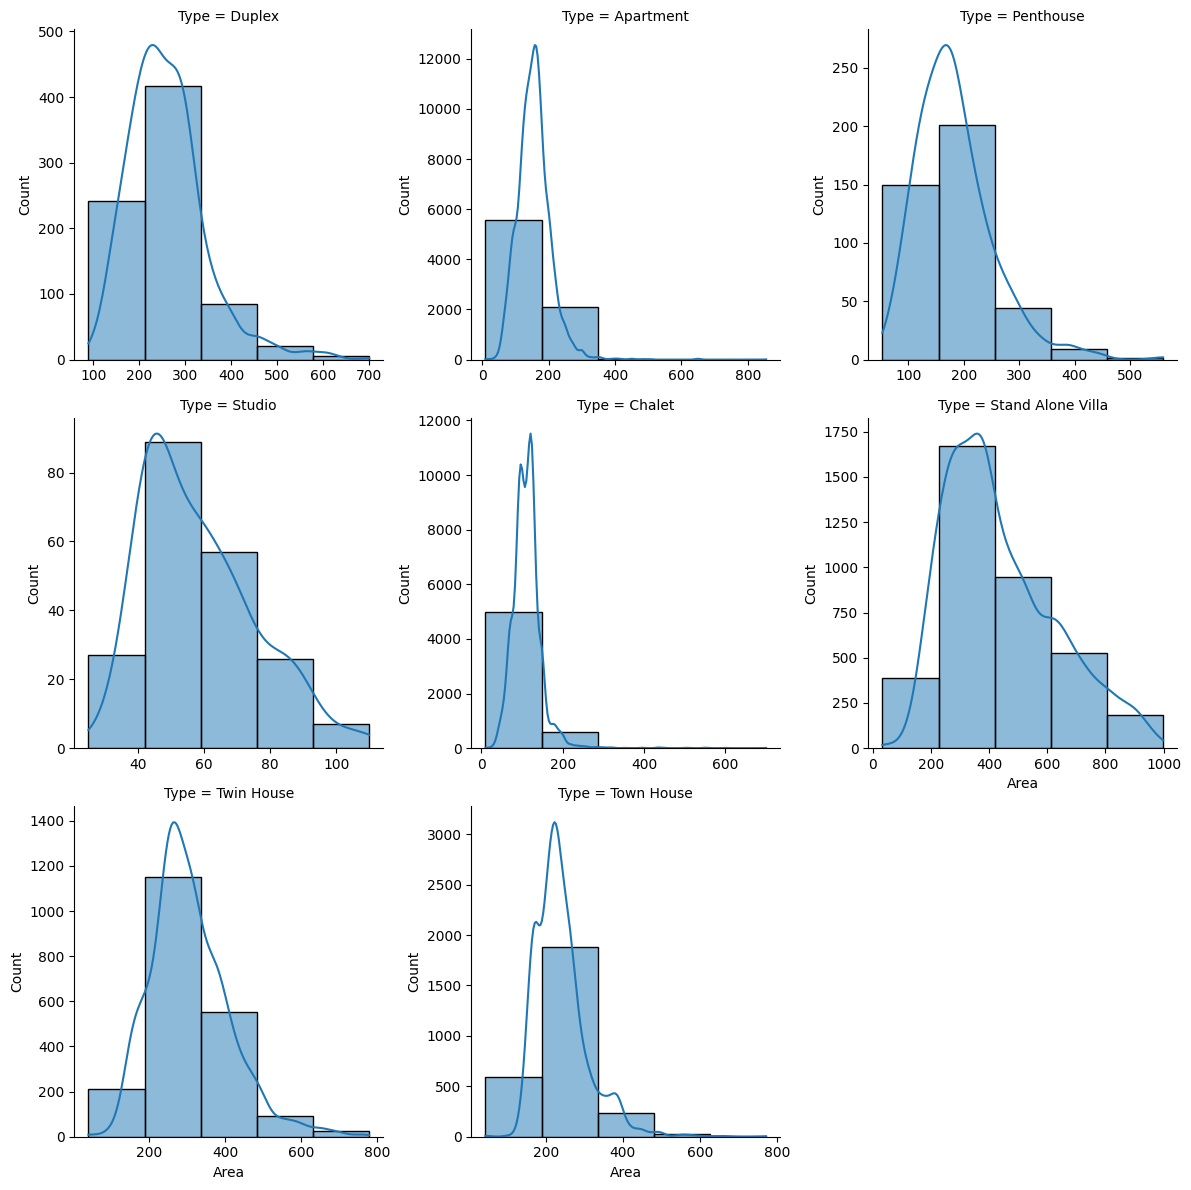

In [32]:
#There's no non-numeric characters in Area column
#Convert the column type into float
df['Area'] = df['Area'].astype(float)

# Drawing histogram to see it's distribution
g = sns.FacetGrid(df, col="Type", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="Area", bins=5, kde=True)
plt.show()

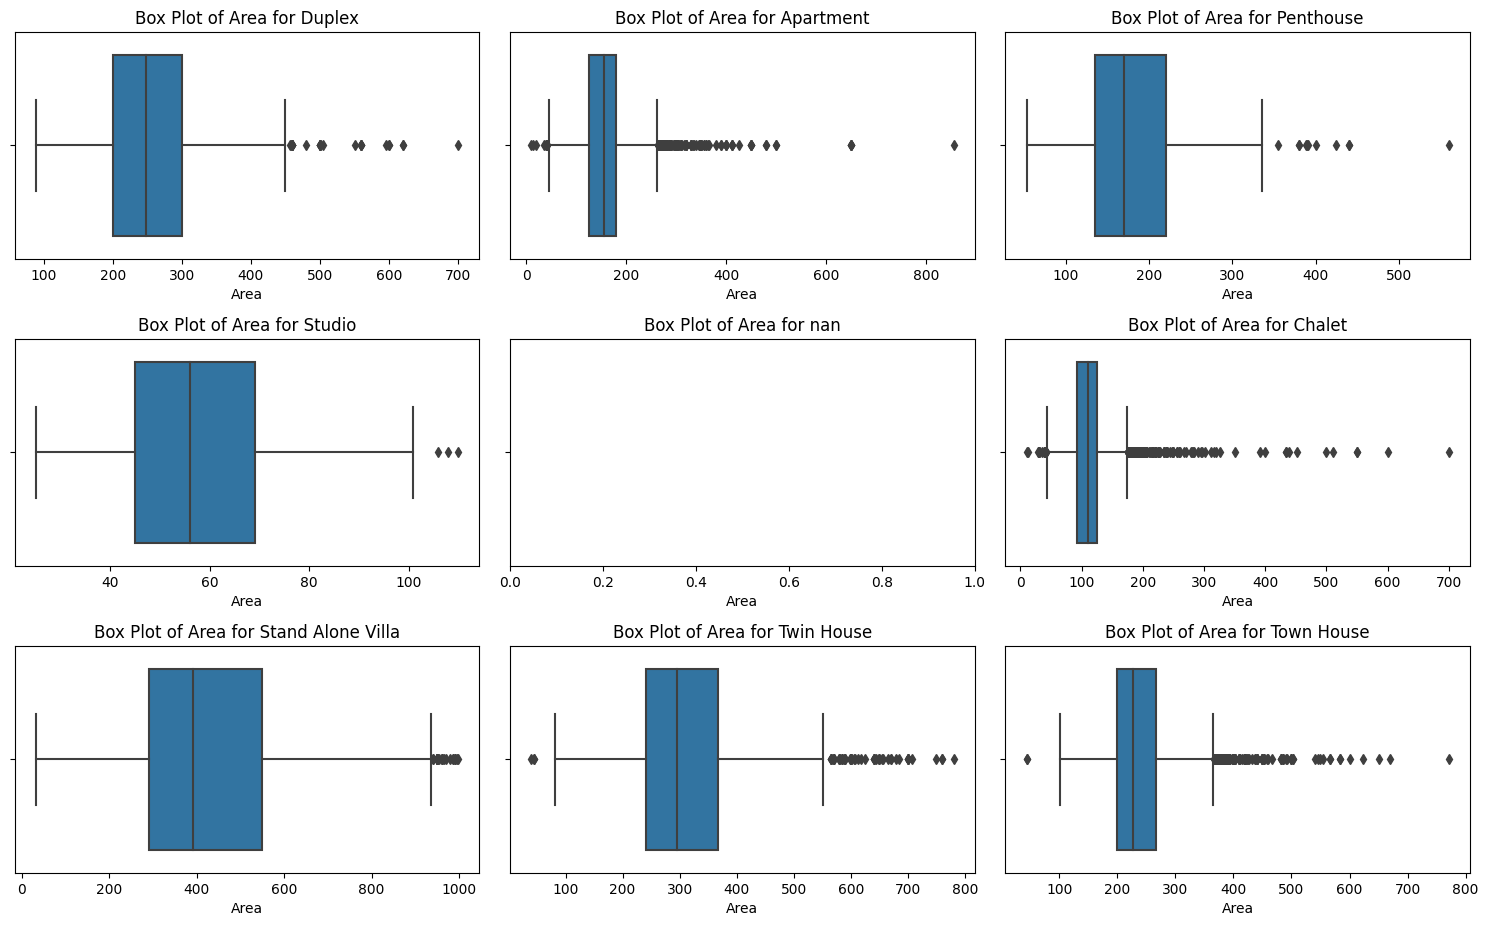

In [33]:
#Visualising Boxplot to see the outliers
property_types = df["Type"].unique()

rows, cols = 4, 3
total_plots = len(property_types)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12))
axes = axes.flatten()

# Plot each property type in a separate subplot
for i, prop_type in enumerate(property_types):
    sns.boxplot(x=df[df["Type"] == prop_type]["Area"], ax=axes[i])
    axes[i].set_title(f'Box Plot of Area for {prop_type}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [34]:
# Define the valid range for each home type
valid_ranges = {
    "Chalet": (30, 180),
    "Apartment": (60, 250),
    "Studio": (30, 70),
    "Penthouse": (100, 240),
    "Duplex": (150, 500),
    "Stand Alone Villa": (180, 400),
    "Town House": (150, 500),
    "Twin House": (150, 500)
}

# Check rows where the area is not in the valid range and add a flag column
def check_invalid_rows(df):
    df["Out_of_Range"] = df.apply(lambda row: 1 if row['Type'] in valid_ranges and not (valid_ranges[row['Type']][0] <= row['Area'] <= valid_ranges[row['Type']][1]) else 0, axis=1)
    return df

# Apply the function
df = check_invalid_rows(df)

In [35]:
df[df["Out_of_Range"]==1]["Type"].value_counts()

Type
Stand Alone Villa    2025
Apartment             281
Chalet                180
Twin House            134
Penthouse              97
Town House             70
Duplex                 60
Studio                 44
Name: count, dtype: int64

In [36]:
df["Type"].value_counts()

Type
Apartment            7688
Chalet               5591
Stand Alone Villa    3893
Town House           2738
Twin House           2037
Duplex                770
Penthouse             405
Studio                207
Name: count, dtype: int64

In [37]:
# Enhancing the ranges of area for each type
def enforce_valid_ranges(df):
    for type, (min_area, max_area) in valid_ranges.items():
        # Find rows outside valid range
        mask_low = (df["Type"] == prop_type) & (df["Area"] < min_area)
        mask_high = (df["Type"] == prop_type) & (df["Area"] > max_area)

        # Clip values slightly outside the range (within 10%)
        df.loc[mask_low & (df["Area"] >= min_area * 0.9), "Area"] = min_area
        df.loc[mask_high & (df["Area"] <= max_area * 1.1), "Area"] = max_area

        # Convert extreme outliers into nan
        df.loc[((mask_low & (df["Area"] < min_area * 0.9)) |
                  (mask_high & (df["Area"] > max_area * 1.1)))] = np.nan
        
    df.drop(['Out_of_Range'], axis=1, inplace=True)

    return df
    
df = enforce_valid_ranges(df)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressio

In [38]:
#Exploring outliers in each property type
outlier_counts = {}
total_outlier = 0

for i, prop_type in enumerate(property_types):
    
    area_data = df[df["Type"] == prop_type]["Area"]

    if len(area_data) == 0:
        print(prop_type)
        continue
    
    Q1 = np.percentile(area_data, 25)
    Q3 = np.percentile(area_data, 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers (values below lower_bound or above upper_bound)
    outliers = area_data[(area_data < lower_bound) | (area_data > upper_bound)]
    outlier_count = len(outliers)
      
    all_count = len(area_data)

    total_outlier = total_outlier + outlier_count
    
    # Store the outlier count for this property type
    outlier_counts[prop_type] = round(outlier_count/all_count*100,2)
    
    # df=df[~((df["Type"]==prop_type) &((area_data < lower_bound) | (area_data > upper_bound)))]
    df[((df["Type"]==prop_type) &((area_data < lower_bound) | (area_data > upper_bound)))]["Area"]=np.nan

# Print the outlier counts
for prop_type, count in outlier_counts.items():
    
    print(f"{prop_type} has {count}% outliers")
print("total number of outlier :"+str(total_outlier) +" and represent "+str(round(total_outlier/df.shape[0]*100,2)) +" % from the data"  )

<ipython-input-38-e4cee7b1a4a1>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[((df["Type"]==prop_type) &((area_data < lower_bound) | (area_data > upper_bound)))]["Area"]=np.nan


nan
Duplex has 3.51% outliers
Apartment has 0.0% outliers
Penthouse has 2.72% outliers
Studio has 0.0% outliers
Chalet has 0.0% outliers
Stand Alone Villa has 0.0% outliers
Twin House has 0.0% outliers
Town House has 0.0% outliers
total number of outlier :38 and represent 0.15 % from the data


<ipython-input-38-e4cee7b1a4a1>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[((df["Type"]==prop_type) &((area_data < lower_bound) | (area_data > upper_bound)))]["Area"]=np.nan


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24873 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            20594 non-null  object 
 1   Price           20593 non-null  float64
 2   Bedrooms        20448 non-null  float64
 3   Bathrooms       20452 non-null  float64
 4   Area            20410 non-null  float64
 5   Furnished       20594 non-null  object 
 6   Level           20594 non-null  object 
 7   Compound        20594 non-null  object 
 8   Payment_Option  20594 non-null  object 
 9   Delivery_Date   20594 non-null  object 
 10  Delivery_Term   20594 non-null  object 
 11  City            20594 non-null  object 
dtypes: float64(4), object(8)
memory usage: 3.0+ MB


In [40]:
df['Furnished'].unique()

array(['No', 'Unknown', 'Yes', nan], dtype=object)

In [41]:
df['Level'].unique()

array(['7', '10+', '1', '10', 'Highest', 'Ground', '3', '2', '4', '9',
       '5', '8', '6', nan, 'Unknown'], dtype=object)

<ipython-input-42-31ca19fc7028>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Level'] = df['Level'].replace('Unknown', np.nan)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

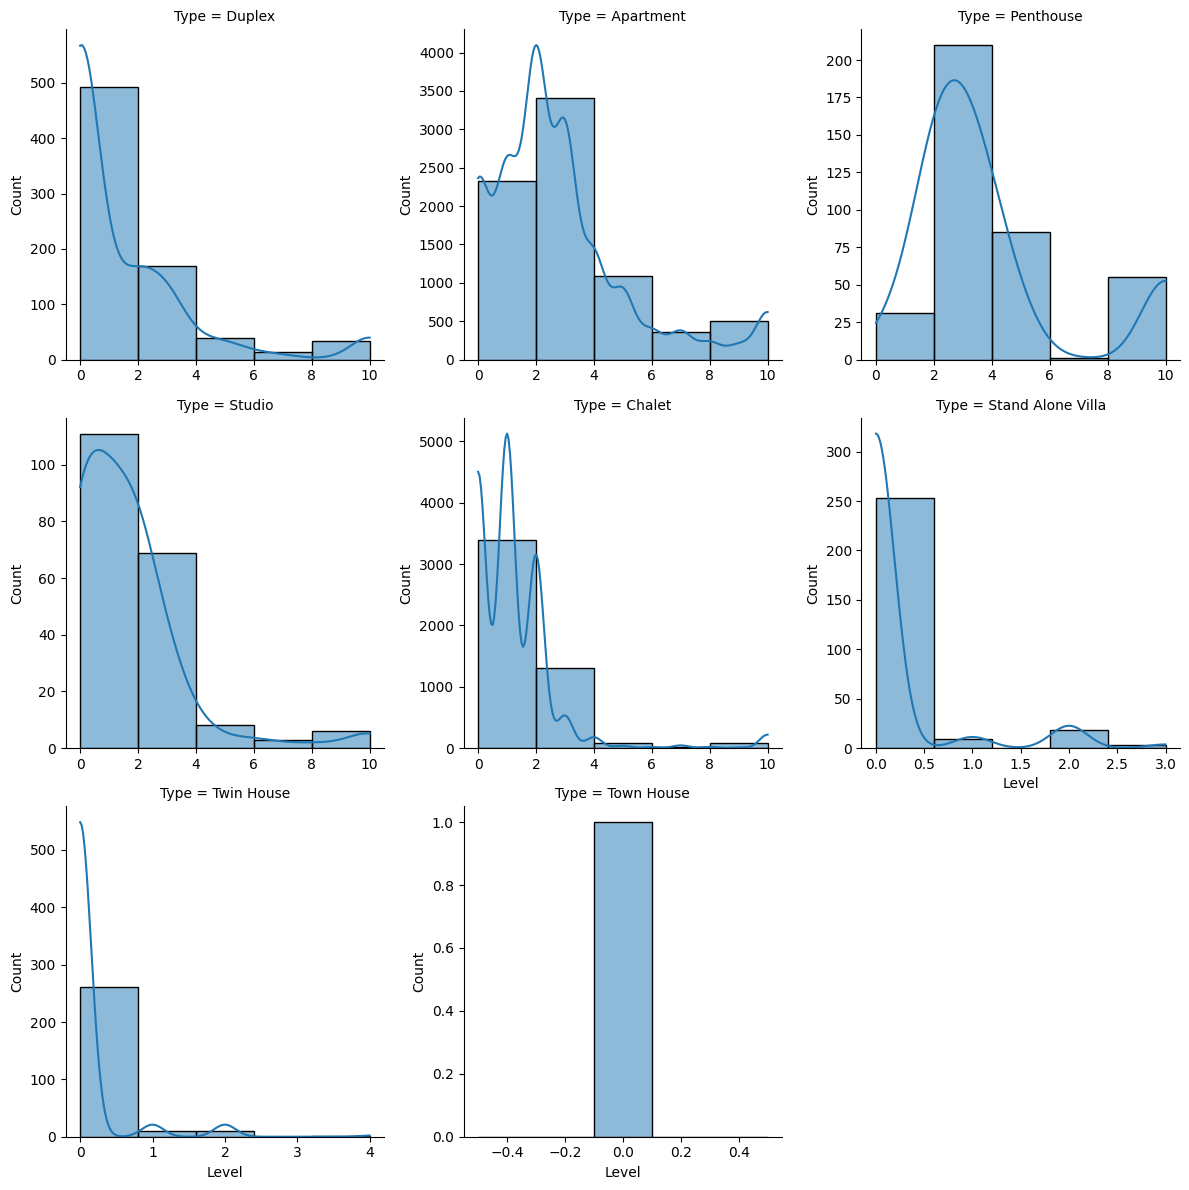

In [42]:
#Imputing the 'Ground' value with 0
df['Level'] = df['Level'].replace('Ground', '0')

#Converting the values into numeric values
df['Level'] = df['Level'].apply(lambda x: int(x) if str(x).isdigit() else x)

#Imputing the 'Highest' & '10+' values with the maximum level for its property type
df['Level'] = df['Level'].replace('10+', 'Highest')
max_levels = df[(df['Level'] != 'Highest') & (df['Level'] != 'Unknown')].groupby('Type')['Level'].max()
df['Level'] = df.apply(lambda row: max_levels[row['Type']] if row['Level'] == 'Highest' else row['Level'], axis=1)

#Converting the column into numerical to visualize
df['Level'] = df['Level'].replace('Unknown', np.nan)
df['Level'] = df['Level'].astype(float)

#Drawing histogram to see it's distribution
g = sns.FacetGrid(df, col="Type", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="Level", bins=5, kde=True)
plt.show()

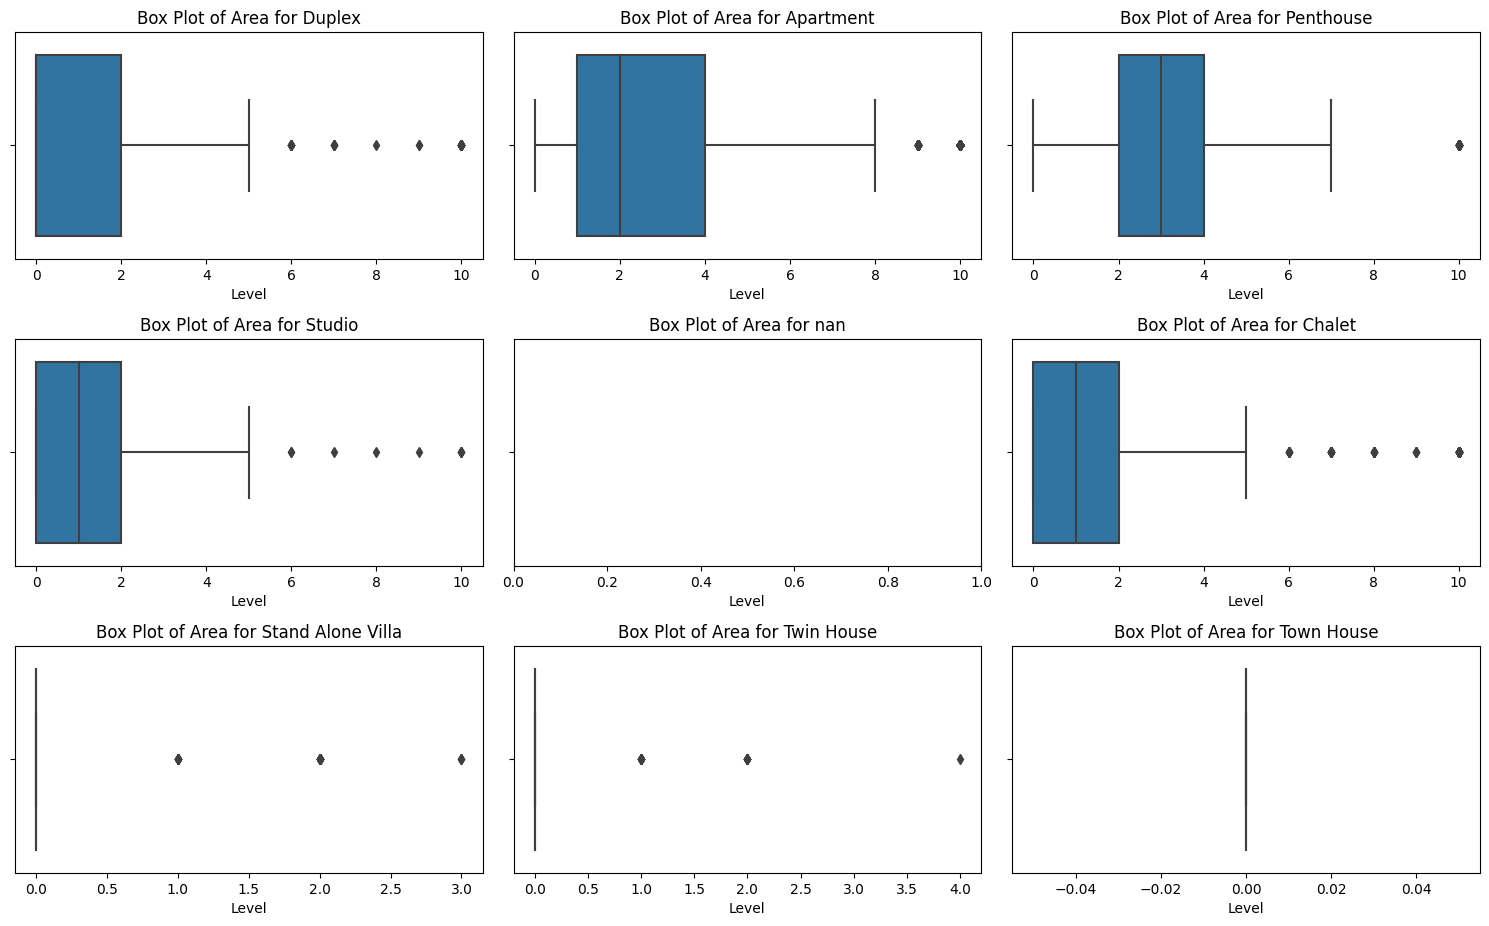

In [43]:
#Visualising Boxplot to see the outliers
property_types = df["Type"].unique()

rows, cols = 4, 3
total_plots = len(property_types)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12))
axes = axes.flatten()

# Plot each property type in a separate subplot
for i, prop_type in enumerate(property_types):
    sns.boxplot(x=df[df["Type"] == prop_type]["Level"], ax=axes[i])
    axes[i].set_title(f'Box Plot of Area for {prop_type}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24873 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            20594 non-null  object 
 1   Price           20593 non-null  float64
 2   Bedrooms        20448 non-null  float64
 3   Bathrooms       20452 non-null  float64
 4   Area            20410 non-null  float64
 5   Furnished       20594 non-null  object 
 6   Level           14471 non-null  float64
 7   Compound        20594 non-null  object 
 8   Payment_Option  20594 non-null  object 
 9   Delivery_Date   20594 non-null  object 
 10  Delivery_Term   20594 non-null  object 
 11  City            20594 non-null  object 
dtypes: float64(5), object(7)
memory usage: 3.0+ MB


In [45]:
values = np.sort(df[~df['Compound'].isnull()]['Compound'].unique())
values

array(['2020 Compound', '90 Avenue', 'ABHA', 'AZAD', 'Aeon', 'Aghadir',
       'Agora', 'Aida Beach', 'Al Burouj', 'Al Diyar', 'Al Hayah',
       'Al Hegaz', 'Al Maamourah El Gadida', 'Al Maqsad', 'Al Nasayem',
       'Al Rabwa', 'Al Reviera', 'Al Shorouk',
       'Al Solaimaneyah Golf City', 'Al Yasmine', 'Alamein Towers',
       'Allegria', 'Alma', 'Almanal', 'Almaza Bay', 'Amexco paradise',
       'Amigo', 'Amorada', 'Amoun', 'Amwaj', 'Anakaji', 'Andalus',
       'Aqua View', 'Arabella Park', 'Areej', 'Arena City Towers', 'Aria',
       'Armonia', 'Aroma Residence', 'Asala', 'Ashgar City',
       'Assiut University', 'Aswar', 'Atic', 'Atika', 'Atrio', 'Azha',
       'Azzar', 'BOHO', 'Badya Palm Hills', 'Baet El Masria',
       'Bamboo Palm Hills', 'Baron City', 'BatterSea', 'Bavaria Town',
       'Baymount', 'Bedaya', 'Beit Al Watan', 'Bella Vista', 'Bellagio',
       'Belle Vie', 'Beta Gardens', 'Beta Greens', 'Beverly Hills',
       'Bianchi', 'Bienestar', 'Bloomfields', 'Blue Bay

In [46]:
#Trying to find if there's duplicated values with typo in Compound column
for i in range(1,len(values)):
  if Levenshtein.distance(values[i-1], values[i]) <= 2:
    print(values[i - 1] + ' => ' + values[i])

Atic => Atika
Azha => Azzar
Beta Gardens => Beta Greens
EL Patio 2 => EL Patio 3
EL Patio 3 => EL Patio 4
EL Patio 4 => EL Patio 5
EL Patio 5 => EL Patio 6
EL Patio 6 => EL Patio 7
El Karma => El Karma 2
El Karma 2 => El Karma 4
Jebal => Jedar
La Vista 1 => La Vista 2
La Vista 2 => La Vista 3
La Vista 3 => La Vista 4
La Vista 4 => La Vista 5
La Vista 5 => La Vista 6
La Vista 6 => La Vista 7
Marina 1 => Marina 2
Marina 2 => Marina 4
Marina 4 => Marina 5
Marina 5 => Marina 6
Marina 6 => Marina 7
Marseilia Beach 1 => Marseilia Beach 2
Marseilia Beach 2 => Marseilia Beach 3
Marseilia Beach 3 => Marseilia Beach 4
Mena => Mena 3
Mena 3 => Mena 4
Mountain View 1 => Mountain View 2
Mountain View 2 => Mountain View 3
Rosa => Rosana
Zahra => Zahya


In [47]:
df['Payment_Option'].unique()

array(['Cash', 'Cash or Installment', 'Unknown Payment', 'Installment',
       nan], dtype=object)

In [48]:
df['Delivery_Date'].unique()

array(['Ready to move', '2024', 'Unknown', '2023', 'soon', '2025',
       'within 6 months', '2022', nan, '2026', '2027'], dtype=object)

In [49]:
df['Delivery_Term'].unique()

array(['Finished', 'Semi Finished', 'Core & Shell', 'Unknown ',
       'Not Finished', nan], dtype=object)

In [50]:
values = np.sort(df[~df['City'].isnull()]['City'].unique())
values

array(['(View phone number)', '10th of Ramadan', '15 May City',
       '6th of October', 'Abasiya', 'Abu Qir', 'Abu Rawash', 'Abu Talat',
       'Aga', 'Agami', 'Agouza', 'Ain Shams', 'Ain Sukhna',
       'Al Amiriyyah', 'Al Hadrah', 'Al Ibrahimiyyah', 'Al Manial',
       'Alamein', 'Almazah', 'Amreya', 'Arab District', 'Arbaeen',
       'Ard El Lewa', 'Asafra', 'Aswan City', 'Asyut City', 'Ataba',
       'Attaka', 'Attarin', 'Awayed', 'Azarita', 'Bacchus', 'Badr City',
       'Bahray - Anfoshy', 'Banha', 'Beni Suef City', 'Bolkly',
       'Borg al-Arab', 'Boulaq', 'Boulaq Dakrour', 'Camp Caesar',
       'Cleopatra', 'Dabaa', 'Damanhour', 'Damietta City',
       'Dar al-Salaam', 'Darb al-Ahmar', 'Dawahy District', 'Dhahria',
       'Dokki', 'Downtown Cairo', 'El Fostat', 'El Max', 'Ezbet El Nakhl',
       'Faisal', 'Faisal District', 'Fayed', 'Fleming', 'Gamasa',
       'Ganoub District', 'Garden City', 'Gesr Al Suez', 'Gianaclis',
       'Giza District', 'Glim', 'Gomrok', 'Gouna',
   

In [51]:
#Replacing '(View phone number)' into Unknown
df['City'] = df['City'].replace('(View phone number)', 'Unknown')

values = np.sort(df[~df['City'].isnull()]['City'].unique())
values

array(['10th of Ramadan', '15 May City', '6th of October', 'Abasiya',
       'Abu Qir', 'Abu Rawash', 'Abu Talat', 'Aga', 'Agami', 'Agouza',
       'Ain Shams', 'Ain Sukhna', 'Al Amiriyyah', 'Al Hadrah',
       'Al Ibrahimiyyah', 'Al Manial', 'Alamein', 'Almazah', 'Amreya',
       'Arab District', 'Arbaeen', 'Ard El Lewa', 'Asafra', 'Aswan City',
       'Asyut City', 'Ataba', 'Attaka', 'Attarin', 'Awayed', 'Azarita',
       'Bacchus', 'Badr City', 'Bahray - Anfoshy', 'Banha',
       'Beni Suef City', 'Bolkly', 'Borg al-Arab', 'Boulaq',
       'Boulaq Dakrour', 'Camp Caesar', 'Cleopatra', 'Dabaa', 'Damanhour',
       'Damietta City', 'Dar al-Salaam', 'Darb al-Ahmar',
       'Dawahy District', 'Dhahria', 'Dokki', 'Downtown Cairo',
       'El Fostat', 'El Max', 'Ezbet El Nakhl', 'Faisal',
       'Faisal District', 'Fayed', 'Fleming', 'Gamasa', 'Ganoub District',
       'Garden City', 'Gesr Al Suez', 'Gianaclis', 'Giza District',
       'Glim', 'Gomrok', 'Gouna', 'Hadayek 6th of October',


In [52]:
#Trying to find duplicated values with typo
for i in range(1,len(values)):
  if Levenshtein.distance(values[i-1], values[i]) <= 4:
    print(values[i - 1] + ' => ' + values[i])

Abu Rawash => Abu Talat
Aga => Agami
Agami => Agouza
Aswan City => Asyut City
Ataba => Attaka
Attaka => Attarin
Gomrok => Gouna
Hammam => Haram
Manshiyya => Mansura
Mansura => Mansuriyya
Sadat => Safaga
Sidi Beshr => Sidi Gaber
Talkha => Tanta
Tanta => Tersa
Tersa => Tura


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24873 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            20594 non-null  object 
 1   Price           20593 non-null  float64
 2   Bedrooms        20448 non-null  float64
 3   Bathrooms       20452 non-null  float64
 4   Area            20410 non-null  float64
 5   Furnished       20594 non-null  object 
 6   Level           14471 non-null  float64
 7   Compound        20594 non-null  object 
 8   Payment_Option  20594 non-null  object 
 9   Delivery_Date   20594 non-null  object 
 10  Delivery_Term   20594 non-null  object 
 11  City            20594 non-null  object 
dtypes: float64(5), object(7)
memory usage: 3.0+ MB


In [54]:
def impute_missing_values(df, columns_to_impute, grouping_columns):
    # Create copies for median and mean imputation
    df_median_imputed = df.copy()
    df_mean_imputed = df.copy()

    # Apply median imputation
    df_median_imputed[columns_to_impute] = df_median_imputed.groupby(grouping_columns)[columns_to_impute].transform(
        lambda x: x.fillna(x[x.notnull()].median())
    )

    # Apply mean imputation
    df_mean_imputed[columns_to_impute] = df_mean_imputed.groupby(grouping_columns)[columns_to_impute].transform(
        lambda x: x.fillna(x[x.notnull()].mean())
    )

    # Compute percentage difference
    percentage_difference = (abs(df_mean_imputed[columns_to_impute] - df_median_imputed[columns_to_impute]) / df_median_imputed[columns_to_impute]) * 100

    # Get the average percentage difference per column
    average_percentage_difference = percentage_difference.mean()

    # Return the imputed DataFrame and the average percentage difference
    return df_median_imputed, average_percentage_difference

# Usage example:
columns_to_impute = ['Price', 'Bedrooms', 'Bathrooms', 'Area', 'Level']
grouping_columns = ['Type', 'Compound', 'City']


for i in range(len(grouping_columns) , 0, -1):
    df, average_percentage_difference = impute_missing_values(df, columns_to_impute, grouping_columns[:i])
    print("Average Percentage Difference:", average_percentage_difference)

Average Percentage Difference: Price        0.000810
Bedrooms     0.052891
Bathrooms    0.056473
Area         0.055942
Level             inf
dtype: float64
Average Percentage Difference: Price        0.000000
Bedrooms     0.000377
Bathrooms    0.000300
Area         0.003563
Level             inf
dtype: float64
Average Percentage Difference: Price        0.000000
Bedrooms     0.001592
Bathrooms    0.000534
Area         0.003474
Level             inf
dtype: float64


In [55]:
df.isnull().sum()

Type              4279
Price             4279
Bedrooms          4279
Bathrooms         4279
Area              4282
Furnished         4279
Level             4279
Compound          4279
Payment_Option    4279
Delivery_Date     4279
Delivery_Term     4279
City              4279
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
#The total percentage of lost data
(1-df.shape[0]/data.shape[0])*100

24.743247688315485

# Exploratory Data Analysis(EDA)

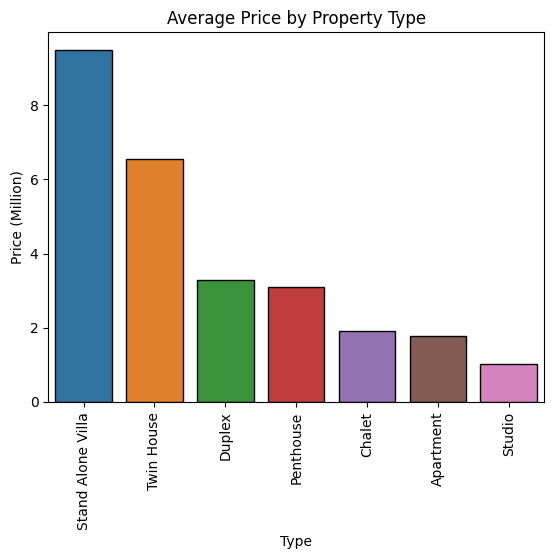

In [58]:
#What is the average of prices for each property type?
avg_price_by_type = df.groupby('Type')['Price'].mean().sort_values(ascending=False).reset_index()
avg_price_by_type['Price'] = avg_price_by_type['Price'] / 1e6
sns.barplot(data = avg_price_by_type, x= 'Type', y= 'Price', edgecolor='black')
plt.title('Average Price by Property Type')
plt.ylabel('Price (Million)')
plt.xticks(rotation=90)
plt.show()

**Observations:**

  - Standalone Villas are the most expensive, meaning it would be a good choice for wealthy buyers.

  - Studios and Apartments are the most affordable, making them ideal for first-time buyers & middle-income investors.

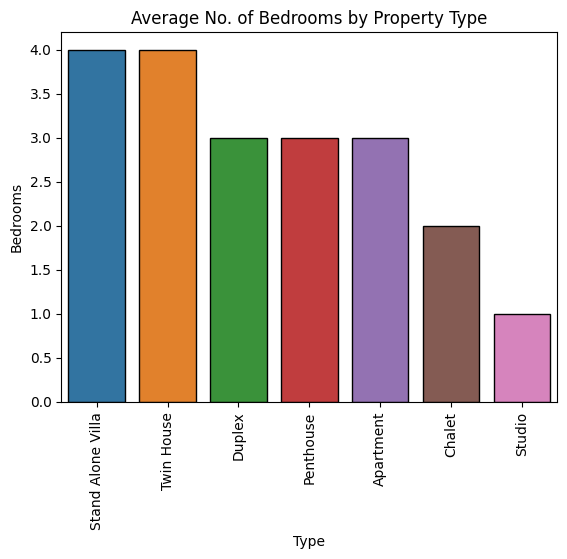

In [59]:
#What's the average no. of bedrooms for each property type?
avg_bedrooms_by_type = df.groupby('Type')['Bedrooms'].mean().sort_values(ascending=False).round().astype(int).reset_index()
sns.barplot(data = avg_bedrooms_by_type, x='Type', y= 'Bedrooms', edgecolor='black')
plt.title('Average No. of Bedrooms by Property Type')
plt.xticks(rotation=90)
plt.show()

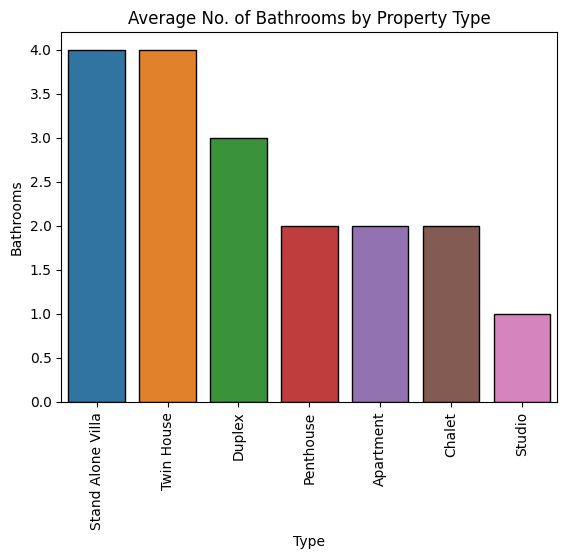

In [60]:
#What's the average no. of bathrooms for each property type?
avg_bedrooms_by_type = df.groupby('Type')['Bathrooms'].mean().sort_values(ascending=False).round().astype(int).reset_index()
sns.barplot(data = avg_bedrooms_by_type, x = 'Type', y= 'Bathrooms', edgecolor='black')
plt.title('Average No. of Bathrooms by Property Type')
plt.xticks(rotation=90)
plt.show()

**Observations:**
  - (Standalone Villas, Twin Houses, Duplex) are a good choices for families & high-income buyers who need more rooms.

  - (Penthouses, Apartments) are a good choices for upper-middle-class buyers or investment properties.
  
  - (Chalets, Studios) are affordable and attract single professionals, young couples, or holiday renters.
  More suitable for rental investments than family living.

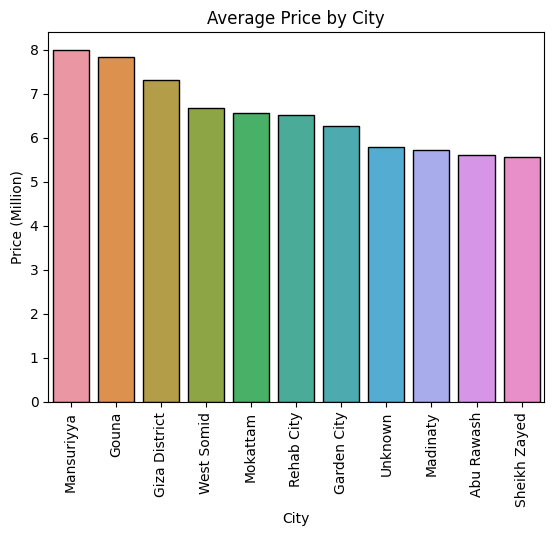

In [61]:
#What's the top10 cities in average of prices of property?
avg_price_by_city = df.groupby('City')['Price'].mean().sort_values(ascending=False).iloc[:11].reset_index()
avg_price_by_city['Price'] = avg_price_by_city['Price'] / 1e6
sns.barplot(data= avg_price_by_city, x='City', y='Price', edgecolor='black')
plt.title('Average Price by City')
plt.ylabel('Price (Million)')
plt.xticks(rotation=90)
plt.show()

**Observation:**
These cities have the highest average property prices, so they would be good choices for investing on villas and high-price properties.

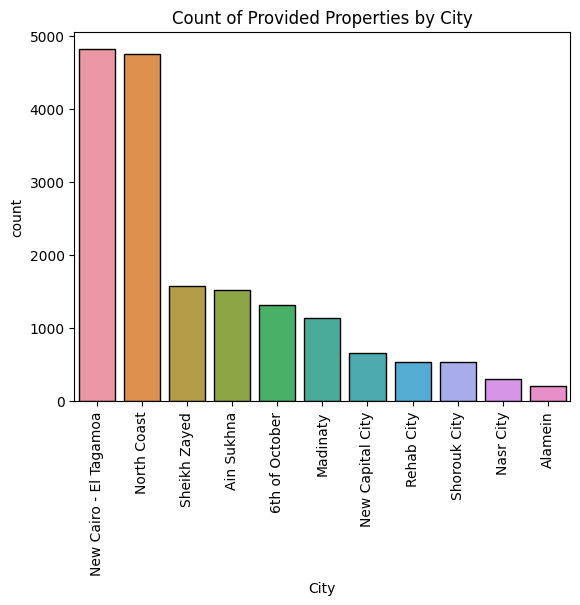

In [62]:
#What's the top10 cities in count of provided properties?
count_by_city = df['City'].value_counts().iloc[:11].reset_index()
sns.barplot(data = count_by_city, x='City', y= 'count', edgecolor='black')
plt.title('Count of Provided Properties by City')
plt.xticks(rotation=90)
plt.show()

**Observation:** These cities are the top10 for number of properties provided, this means that these cities would have high demand in selling.

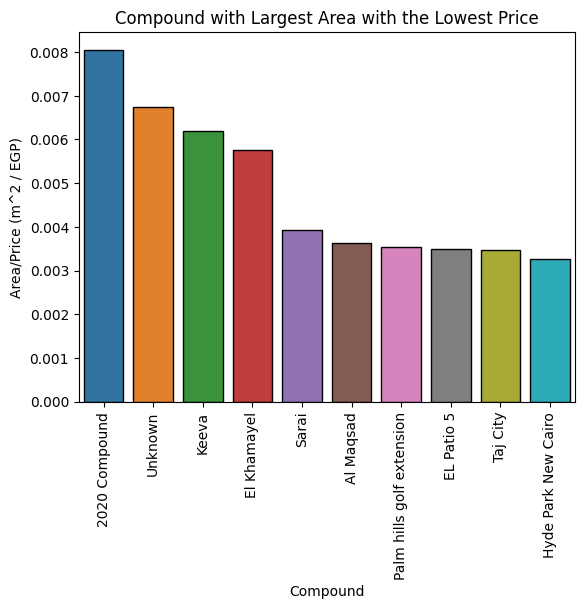

In [63]:
#Which compound provides the largest area with the lowest price?
compound_stats = df.groupby('Compound').agg({'Area': 'mean', 'Price': 'min'})
compound_stats['Area_Price_Ratio'] = compound_stats['Area'] / compound_stats['Price']
compound_stats = compound_stats[['Area_Price_Ratio']].sort_values(by='Area_Price_Ratio', ascending=False).iloc[:10].reset_index()
sns.barplot(data= compound_stats, x= 'Compound', y= compound_stats['Area_Price_Ratio'], edgecolor='black')
plt.title('Compound with Largest Area with the Lowest Price')
plt.ylabel('Area/Price (m^2 / EGP)')
plt.xticks(rotation=90)
plt.show()

**Observation:**
These compounds provides a large area per price, so they would be good choices in investments and for people cares about the quality per price.

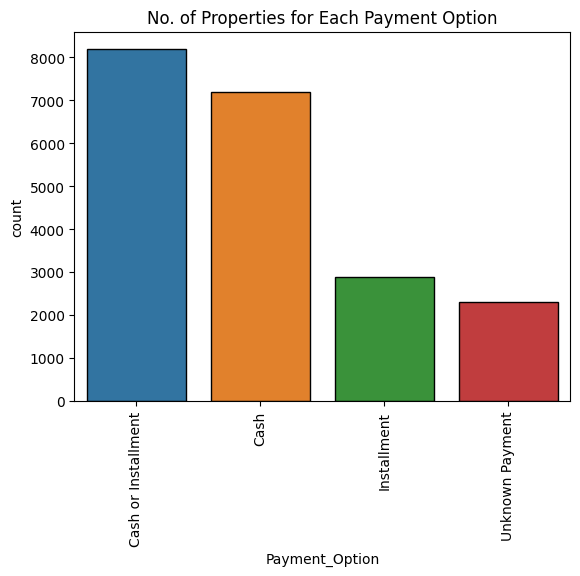

In [64]:
#What's the no. of properties for each payment option?
payment_option_counts = df['Payment_Option'].value_counts().reset_index()
sns.barplot(data = payment_option_counts, x= 'Payment_Option', y= 'count', edgecolor='black')
plt.title('No. of Properties for Each Payment Option')
plt.xticks(rotation=90)
plt.show()

**Observation:**
There's a few properties advertised for installment than cash, it would be a great investment to advertise more properties for installment which would return a large profit as long-term investment.

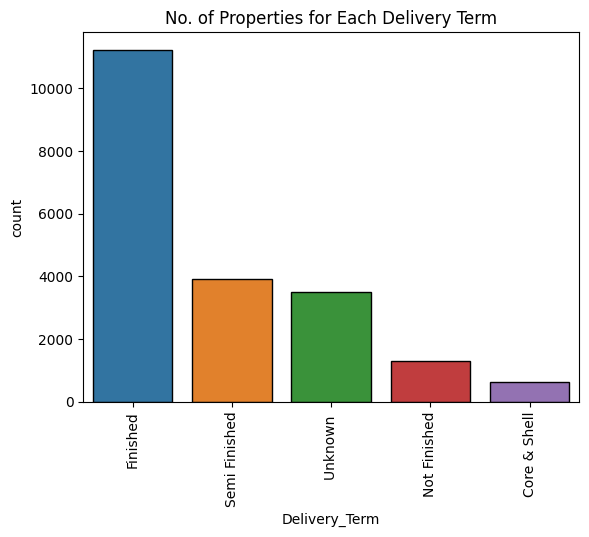

In [65]:
#What's the no. of properties for each delivery term?
delivery_term_counts = df['Delivery_Term'].value_counts().reset_index()
sns.barplot(data = delivery_term_counts,x= 'Delivery_Term',y= 'count', edgecolor='black')
plt.title('No. of Properties for Each Delivery Term')
plt.xticks(rotation=90)
plt.show()

**Observation:**
Most of properties are going to be delivered with 'finished' status and little are going to be with 'Core & Shell' status, so it would be a good investment to provide more properties with this status with lower price in luxury places.

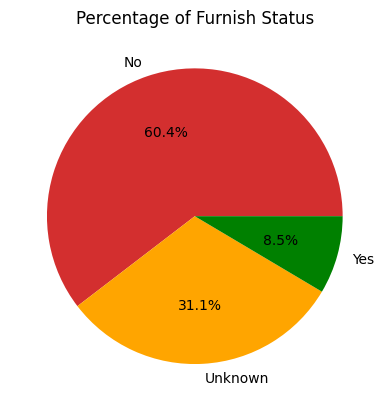

In [66]:
#What's the percentage of each furnish status?
furnish_counts = df['Furnished'].value_counts()
plt.pie(furnish_counts.values, labels=furnish_counts.index, autopct='%1.1f%%', colors=['#D32F2F', 'orange', 'green'])
plt.title('Percentage of Furnish Status')
plt.show()

**Observation:**
Most of the properties are not furnished, it would be a good investment to provide more properties to be delivered furnished to get demand on them.

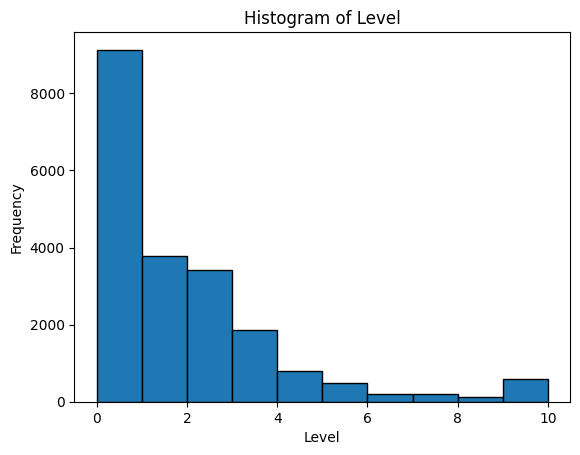

In [67]:
#Distribution of level
plt.hist(df['Level'], edgecolor='black')

plt.xlabel('Level')
plt.ylabel('Frequency')
plt.title('Histogram of Level')
plt.show()


In [68]:
#Percentage of properties on floors below 8
percentage = df[df["Level"] < 8]["Level"].count() / df["Level"].count() * 100
print(f"The percentage of places that are on floors below 8 is: {percentage:.2f}%")

The percentage of places that are on floors below 8 is: 96.57%


**Observation:** The histogram of the Level column reveals that the distribution of floor levels is right-skewed, meaning that there are fewer higher-floor properties. Additionally, 96.57% of the properties with known floor levels are located on floors below 8, so it seems that the demand is on properties with lower floors.

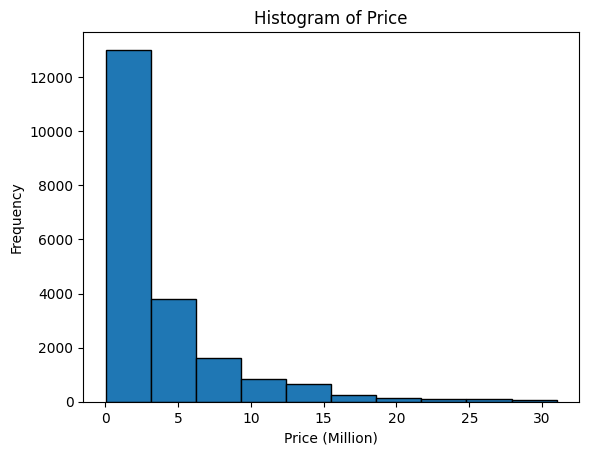

In [69]:
#Distribution of price
plt.hist(df["Price"] / 1e6, edgecolor='black')

plt.xlabel('Price (Million)')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

In [70]:
#Median and mean for the 'Price' column
print("Median of Price:", df["Price"].median())
print("Mean of Price:", df["Price"].mean())

Median of Price: 2300000.0
Mean of Price: 3825106.325336312


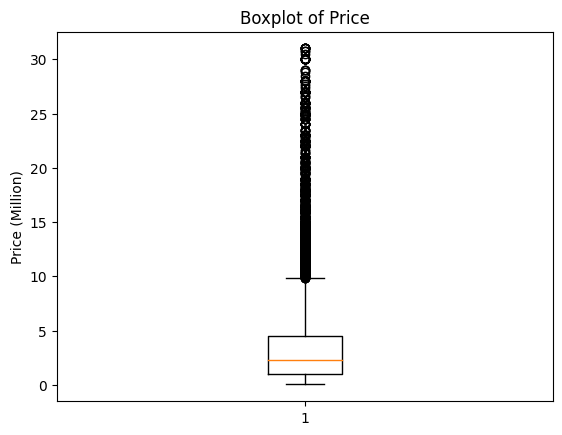

In [71]:
# Visualize the boxplot for price distribution
plt.boxplot(df["Price"] / 1e6)
plt.title('Boxplot of Price')
plt.ylabel('Price (Million)')
plt.show()

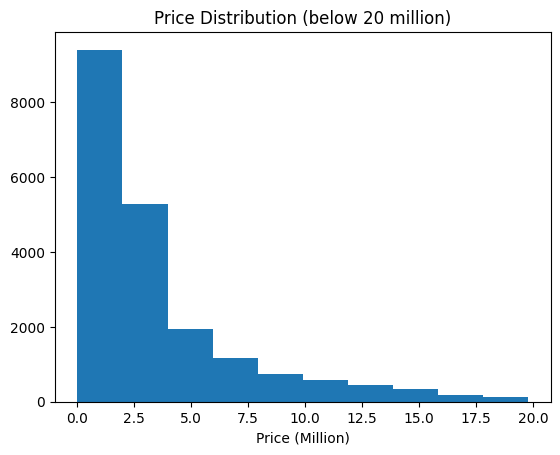

In [72]:
# Filtering and plotting histograms for specific price ranges
part = df[df["Price"] < 20000000]
plt.hist(part['Price'] / 1e6)
plt.title('Price Distribution (below 20 million)')
plt.xlabel('Price (Million)')
plt.show()


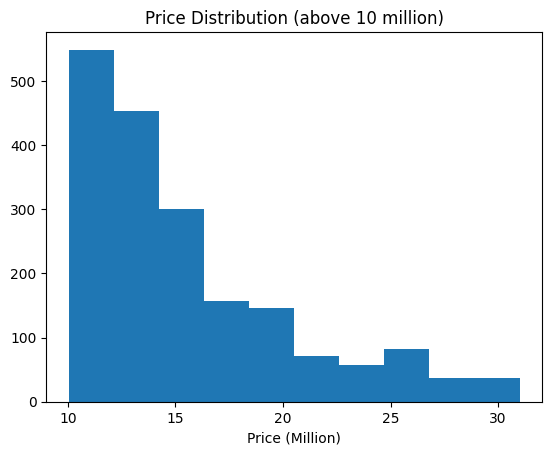

In [73]:
part = df[df["Price"] > 10000000]
plt.hist(part['Price'] / 1e6)
plt.title('Price Distribution (above 10 million)')
plt.xlabel('Price (Million)')
plt.show()


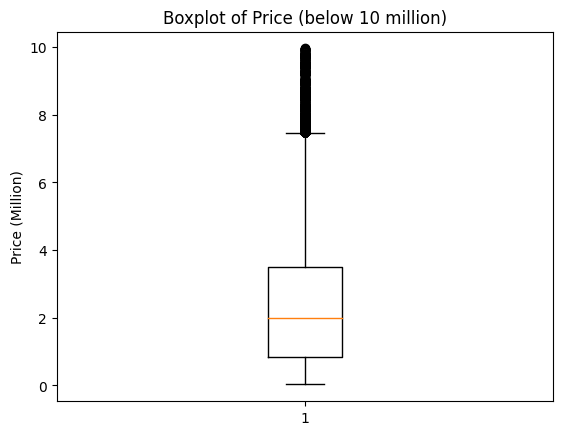

In [74]:
# Display boxplots for price groups based on thresholds
plt.boxplot(df[df["Price"] < 10000000]["Price"] / 1e6)
plt.title('Boxplot of Price (below 10 million)')
plt.ylabel('Price (Million)')
plt.show()


In [75]:
# Median and mean for the Prices below 10 Million
print("Median of Price:", df[df["Price"] < 10000000]["Price"].median())
print("Mean of Price:", df[df["Price"] < 10000000]["Price"].mean())

Median of Price: 2000000.0
Mean of Price: 2585155.913223808


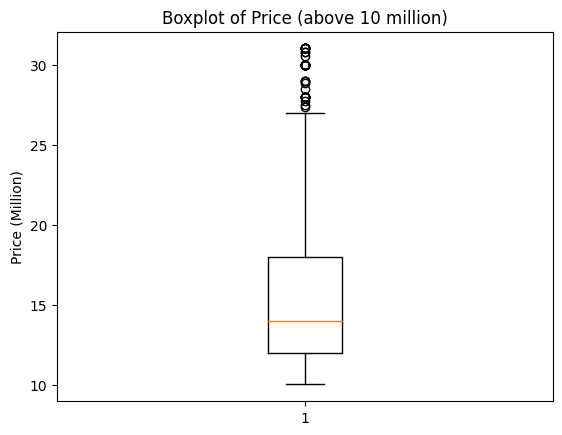

In [76]:
plt.boxplot(df[df["Price"] > 10000000]["Price"] / 1e6)
plt.title('Boxplot of Price (above 10 million)')
plt.ylabel('Price (Million)')
plt.show()


In [77]:
df[df["Price"]<10000000]["Price"].count()/df["Price"].count()

0.9016074984216406

In [78]:
df[df["Price"]<1000000]["Price"].count()/df["Price"].count()

0.2556942353455393

In [79]:
# Get the median and mean of properties priced above 10 million EGP
high_value_properties = df[df["Price"] > 10000000]["Price"]
median_high_value = high_value_properties.median()  # Median price of properties above 10 million EGP
mean_high_value = high_value_properties.mean()  # Mean price of properties above 10 million EGP

print(f"Median price of properties above 10 million EGP: {median_high_value:.2f} EGP")
print(f"Mean price of properties above 10 million EGP: {mean_high_value:.2f} EGP")

Median price of properties above 10 million EGP: 14000000.00 EGP
Mean price of properties above 10 million EGP: 15557559.40 EGP


In [80]:
# Calculate the percentage of properties priced below 20 million EGP
percentage_below_20M = df[df["Price"] < 20000000]["Price"].count() / df["Price"].count()
print(f"Percentage of properties priced below 20 million EGP: {percentage_below_20M * 100:.2f}%")


Percentage of properties priced below 20 million EGP: 98.26%


In [81]:
# Get the maximum and minimum prices in the entire dataset
max_price = df["Price"].max()  # Maximum price of any property
min_price = df["Price"].min()  # Minimum price of any property

print(f"Maximum price of a property: {max_price:.2f} EGP")
print(f"Minimum price of a property: {min_price:.2f} EGP")

Maximum price of a property: 31000000.00 EGP
Minimum price of a property: 30000.00 EGP


***Observations***:

1. **Price Distribution**:
   The 'Price' column exhibits a **right-skewed distribution**. This indicates that the majority of the properties have lower prices, while only a small number of properties have significantly higher prices. The histogram and boxplots clearly illustrate this trend.

2. **Percentage of Properties Below 20 Million EGP**:
   Approximately **98%** of the properties are priced below **20 million EGP**. This suggests that the bulk of the housing market is concentrated in the lower price ranges, with only a small proportion of properties priced above this threshold.

3. **Price Range Breakdown**:
   About **50%** of the properties have a price between **1 million EGP** and **10 million EGP**. This indicates that the mid-range market (1 million to 10 million EGP) is the most prevalent in this dataset, with many properties falling into this price bracket.

---

***Summary***:

- The **price distribution** shows a strong concentration of properties with lower prices, and the market is skewed towards lower-priced properties.
- **98%** of the properties are priced below **20 million EGP**, and a significant **50%** fall within the **1 million to 10 million EGP** range.

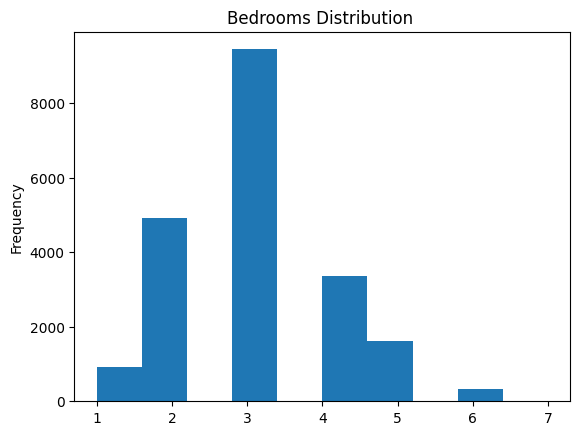

In [82]:
#Bedrooms distribution
df["Bedrooms"].plot(kind="hist", title="Bedrooms Distribution ")
plt.show()


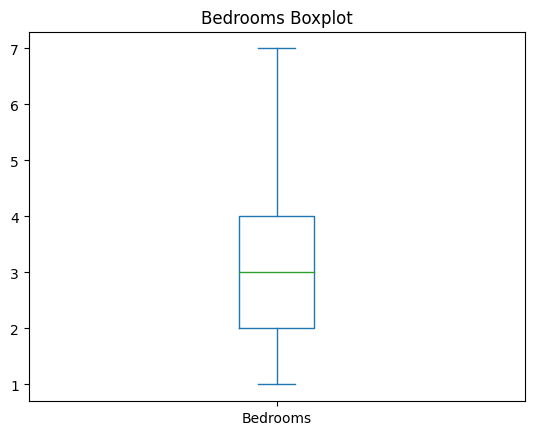

In [83]:
df["Bedrooms"].plot.box(title="Bedrooms Boxplot")
plt.show()

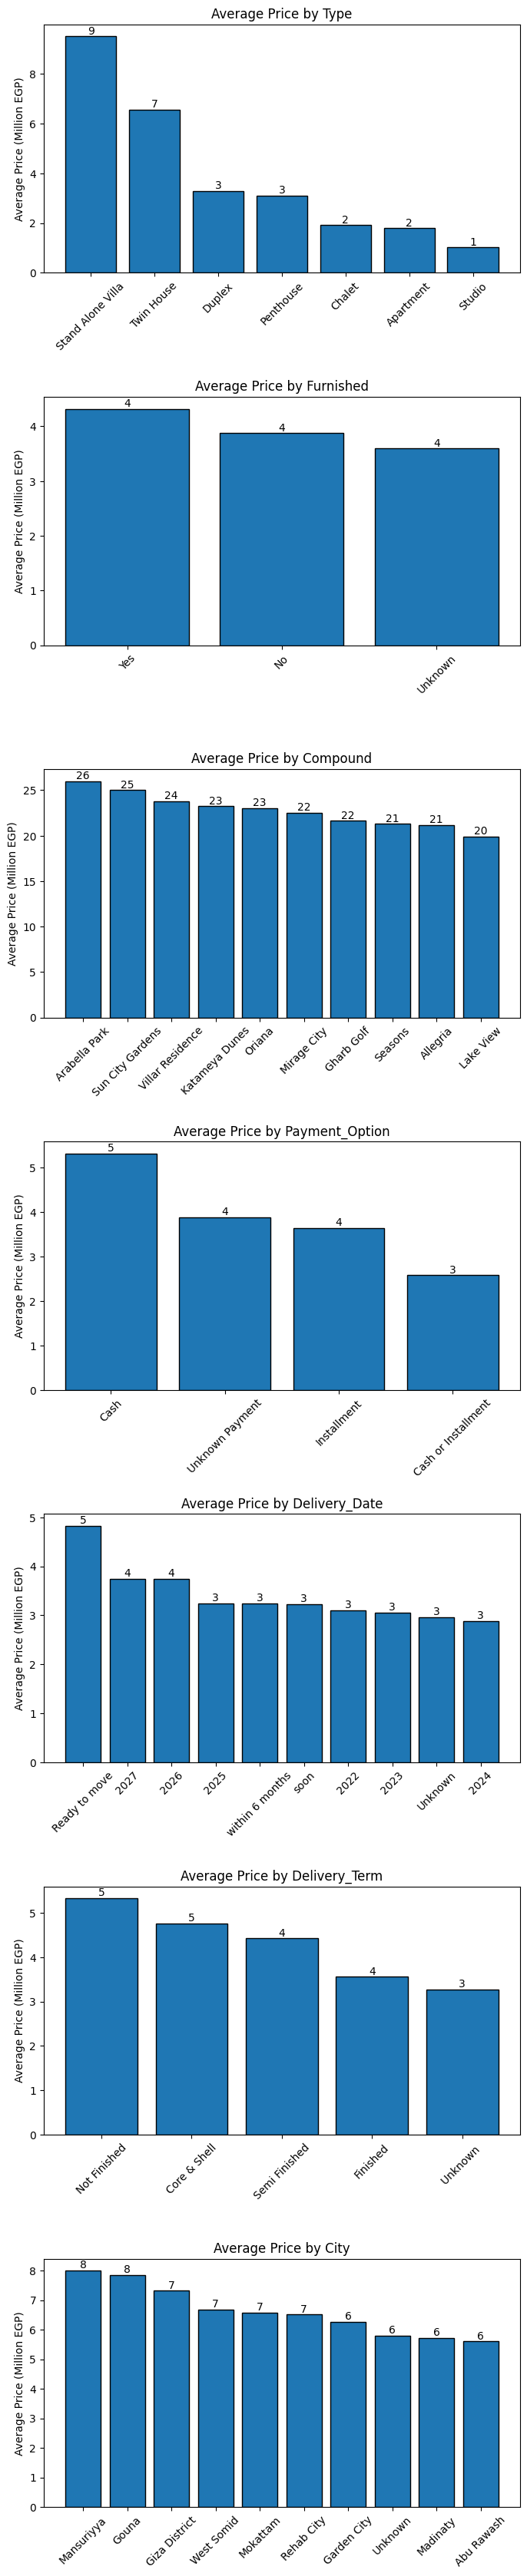

In [84]:
#Investigating the price average based on different values of columns

obj_cols = df.select_dtypes(include="object").columns
fig, axes = plt.subplots(len(obj_cols), 1, figsize=(8, 6 * len(obj_cols)))

counts = df.shape[0]

for label, ax in zip(obj_cols, axes):
    avg_price_per_value = df.groupby(label)['Price'].mean() / 1e6  # Calculate average price per unique value
    avg_price_per_value = avg_price_per_value.sort_values(ascending=False).head(10)  # Get the top 10 values

    # Plot a bar chart
    bars = ax.bar(avg_price_per_value.index, avg_price_per_value.values, edgecolor='black')

    # Set the title and labels for each plot
    ax.set_title(f"Average Price by {label}")
    ax.set_ylabel("Average Price (Million EGP)")
    ax.tick_params(axis='x', rotation=45)

    # Add annotations (average price values) on top of each bar
    for bar in bars:
        yval = bar.get_height()  # Get the height of each bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
            yval,  # Y position (a little above the bar)
            f"{yval:,.0f}",  # Format the annotation with commas for thousands
            ha='center',  # Horizontally align the text to the center
            va='bottom',  # Vertically align the text to the bottom (above the bar)
            fontsize=10
        )

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


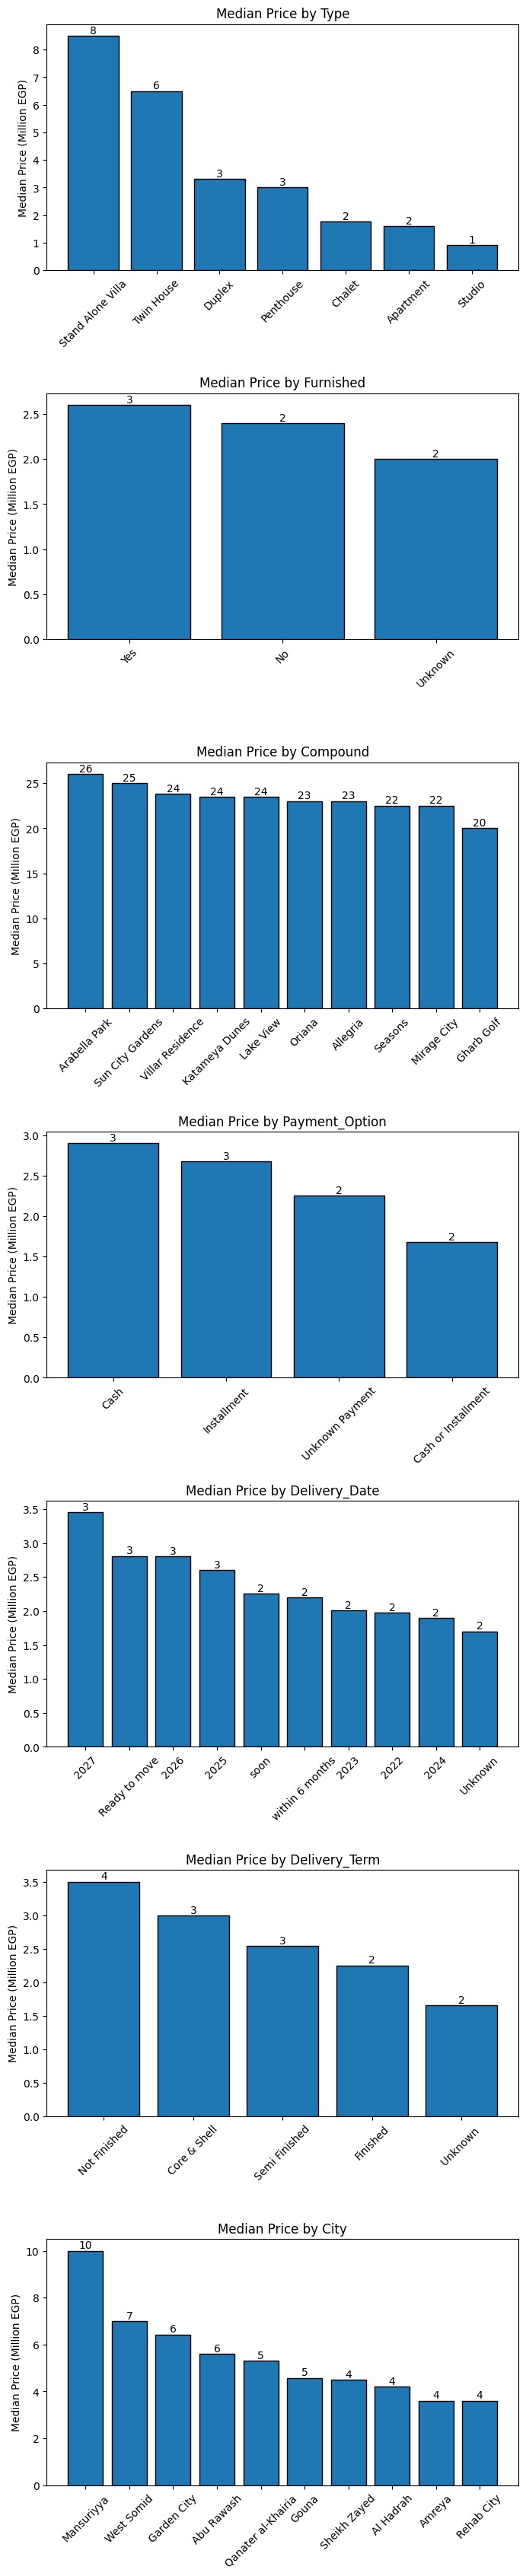

In [85]:
#Investigating the price median based on different values of columns

obj_cols = df.select_dtypes(include="object").columns
fig, axes = plt.subplots(len(obj_cols), 1, figsize=(8, 6 * len(obj_cols)))

counts = df.shape[0]

for label, ax in zip(obj_cols, axes):
    med_price_per_value = df.groupby(label)['Price'].median() / 1e6  # Calculate median price per unique value
    med_price_per_value = med_price_per_value.sort_values(ascending=False).head(10)  # Get the top 10 values

    # Plot a bar chart
    bars = ax.bar(med_price_per_value.index, med_price_per_value.values, edgecolor='black')

    # Set the title and labels for each plot
    ax.set_title(f"Median Price by {label}")
    ax.set_ylabel("Median Price (Million EGP)")
    ax.tick_params(axis='x', rotation=45)

    # Add annotations (median price values) on top of each bar
    for bar in bars:
        yval = bar.get_height()  # Get the height of each bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
            yval,  # Y position (a little above the bar)
            f"{yval:,.0f}",  # Format the annotation with commas for thousands
            ha='center',  # Horizontally align the text to the center
            va='bottom',  # Vertically align the text to the bottom (above the bar)
            fontsize=10
        )

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


### Overall Observations:
- **Location and Type Influence**: Larger, more prestigious locations or compounds tend to have much higher median prices (e.g., Arabella Park, Mansuriyya).
- **Furnishing**: Furnished properties generally have higher median prices than unfurnished ones.
- **Payment and Delivery Options**: Cash payments tend to be associated with more expensive properties, while longer delivery terms (like 2027) also correlate with higher prices.
- **Property Condition**: Properties that are unfinished or semi-finished are generally more expensive, possibly due to customization potential.


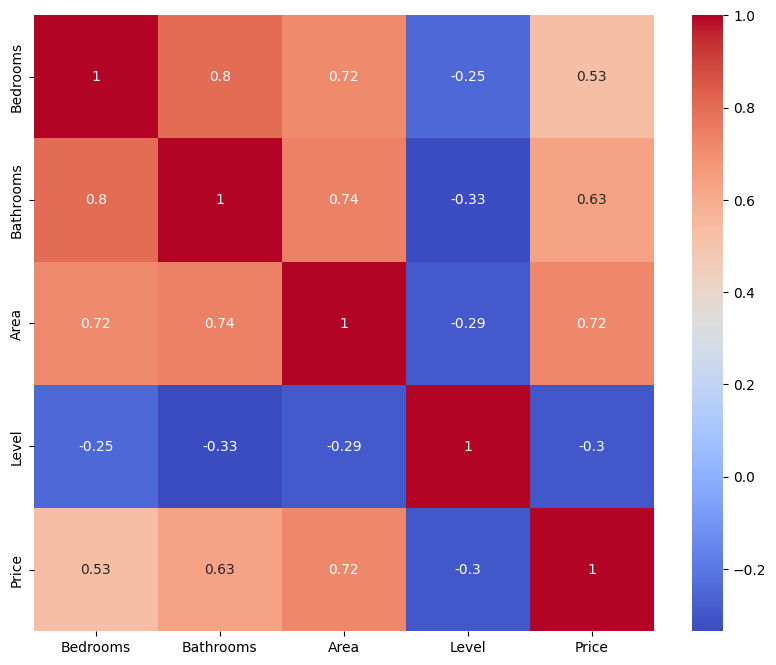

In [86]:
#The correlation of numerical columns
corr = df[['Bedrooms', 'Bathrooms', 'Area', 'Level', 'Price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

***Observations***:

1. Price and Other Variables:
  - **Price and Area**: There is a **moderate positive correlation** (0.72) between **Price** and **Area**, meaning that as the area of the property increases, the price tends to increase as well.

  - **Price and Bathrooms**: A **moderate positive correlation** (0.63) exists between **Price** and **Bathrooms**, meaning that properties with more bathrooms generally have a higher price.

  - **Price and Bedrooms**: There is a **weaker positive correlation** (0.53) between **Price** and **Bedrooms**, indicating that the number of bedrooms has the lowest impact on the price.

  - **Price and Level**: A **slightly negative correlation** (-0.3) between **Price** and **Level** suggests that the floor level has a small inverse relationship with the price.

2. Bedrooms and Bathrooms:
  - There is a **strong positive correlation** (0.8) between **Bedrooms** and **Bathrooms**, implying that properties with more bedrooms usually have more bathrooms.

3. Bedrooms and Area:
  - A **strong positive correlation** (0.72) exists between **Bedrooms** and **Area**, meaning that larger properties with more bedrooms typically have larger areas.

4. Bathrooms and Area:
  - A **strong positive correlation** (0.74) exists between **Bathrooms** and **Area**, indicating that properties with more bathrooms tend to have more area.

5. Level and Other Variables:
  - **Level** has consistently **negative correlations** with all other variables (Bedrooms, Bathrooms, Area, Price), suggesting that higher floors tend to have smaller properties and lower prices.

***Summary:***
  - **Bedrooms**, **Bathrooms**, and **Area** are strongly correlated with each other and also show moderate to strong correlations with **Price**.
  - **Level** shows weak correlations with other variables, especially **Price**, indicating that factors like floor level are less influential on the property's value compared to the size and number of rooms.


# Feature Engineering

In [87]:
# #New Column contains bins for city & type prices (High, Medium, Low) based on their median

# #Computing median price per group
# df['Median_Price'] = df.groupby(['City', 'Type'])['Price'].transform('median')

# #getting the first two quantiles
# q33, q66 = df['Median_Price'].quantile([0.33, 0.66])

# #Assign categories based on quantiles
# def categorize(price):
#     if price <= q33:
#         return 'Low'
#     elif price <= q66:
#         return 'Medium'
#     else:
#         return 'High'

# df['Price_Category'] = df['Median_Price'].apply(categorize)

# #Drop the computed median_price column
# df = df.drop('Median_Price', axis=1)
# df.head()

In [88]:
# Define bins and labels for price categories based on percentiles
price_bins = [0, 500_000, 1_500_000, 5_000_000, 10_000_000, 20_000_000, float("inf")]
price_labels = ["Budget", "Standard", "Premium", "Luxury", "Elite", "Ultra Elite"]

# Apply pd.cut() to categorize the 'Price' column
df["Price_Category"] = pd.cut(df["Price"], bins=price_bins, labels=price_labels, right=True)

# Display category counts
print(df["Price_Category"].value_counts())

Price_Category
Premium        8611
Standard       4279
Budget         3126
Luxury         2684
Elite          1594
Ultra Elite     297
Name: count, dtype: int64


In [89]:
# Define bin edges based on percentiles of actual 'Area' values
bins = np.percentile(df["Area"].dropna(), [0, 25, 50, 75, 100])

# Define labels for categories
labels = ["Small", "Medium", "Large", "Very Large"]

# Apply pd.cut() to categorize the 'Area' column
df["Area_Category"] = pd.cut(df["Area"], bins=bins, labels=labels, include_lowest=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20591 entries, 0 to 27360
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Type            20591 non-null  object  
 1   Price           20591 non-null  float64 
 2   Bedrooms        20591 non-null  float64 
 3   Bathrooms       20591 non-null  float64 
 4   Area            20591 non-null  float64 
 5   Furnished       20591 non-null  object  
 6   Level           20591 non-null  float64 
 7   Compound        20591 non-null  object  
 8   Payment_Option  20591 non-null  object  
 9   Delivery_Date   20591 non-null  object  
 10  Delivery_Term   20591 non-null  object  
 11  City            20591 non-null  object  
 12  Price_Category  20591 non-null  category
 13  Area_Category   20591 non-null  category
dtypes: category(2), float64(5), object(7)
memory usage: 2.1+ MB


In [91]:
#Converting Delivery_Date into numeric values (Assuming that the current date is 1/1/2021)
df['Delivery_Date'] = df['Delivery_Date'].replace({
    'Ready to move': '0',
    'soon': '3',
    'within 6 months': '6',
    '2022': '12',
    '2023': '24',
    '2024': '36',
    '2025': '48',
    '2026': '60',
    '2027': '72',
    'Unknown': np.nan
})
df['Delivery_Date'] = df['Delivery_Date'].astype(float)



df.isnull().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished            0
Level                0
Compound             0
Payment_Option       0
Delivery_Date     7649
Delivery_Term        0
City                 0
Price_Category       0
Area_Category        0
dtype: int64

In [92]:
#Imputing the missing date with the medain in the Delivery_Date column
for i in range(len(grouping_columns) , 0, -1):
    df, average_percentage_difference = impute_missing_values(df, ["Delivery_Date"], grouping_columns[:i])


In [93]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
Price_Category    0
Area_Category     0
dtype: int64

In [94]:

# # Create new features
df["Price_per_sqm"] = df["Price"] / df["Area"]

df["in_Compound"] = df["Compound"].apply(lambda x: 0 if str(x).lower() == "unknown"  else 1)

df["Immediate_Move"] = df["Delivery_Date"].apply(lambda x: 1 if x == 0 else 0)

In [95]:
df.to_csv('Egypt_Houses_Price_Cleaned.csv', index=False)

In [96]:
# #Scaling the numerical columns using MinMax scaler
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# scaler = MinMaxScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# df.head()

In [97]:
# #Encoding the categorical columns using one hot encoder
# categorical_cols = ['City', 'Type', 'Compound', 'Furnished', 'Payment_Option', 'Delivery_Term', 'Price_Category', 'Area_Category']
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# df.head()